##### Alumna: Cristina Caro González
##### Trabajo Fin de Máster

### Introducción

Una cadena local de hoteles y alojamientos quiere expandirse para estar presente en las 10 ciudades más visitadas de Estados Unidos y así aumentar su negocio, beneficios y contactos. 

Las ciudades más visitadas de EEUU son: Nueva York, Chicago, Atlanta, Anaheim/Orange County, Orlando, Los Ángeles, Las Vegas, Filadelfia, San Diego y San Francisco. 

Fuente: https://www.viajablog.com/las-10-ciudades-mas-visitadas-de-estados-unidos/

Al no tener mucha experiencia de estar presente en ciudades grandes, núcleos importantes de negocios y turismo, nos piden analizar los precios de la competencia para así poder establecer el precio de cada habitación/estudio/apartamento dependiendo de las características de este, sin que el precio sea ni muy elevado ni muy bajo para poder obtener el máximo beneficio posible sin dejar que los clientes elijan otro hotel por el precio.

También están interesados en saber cuándo podrían sacar ofertas en el precio de los alojamientos, dependiendo de si el alojamiento está en una zona menos adinerada o en una zona con más índice de criminalidad para así poder sacar rentabilidad de esas zonas más impactadas por otros factores.


### Objetivos

Dado un conjunto de hoteles/apartamentos/estudios, queremos predecir el precio que deberían establecer para que haya suficiente demanda y beneficio para la cadena de hoteles, teniendo en cuanta las rentas de la zona, índice de criminalidad, índice de salud, localización, etc. De tal manera que el precio sea equiparable con el resto de los hoteles de su gama.

### Metodología

###### Generación de conocimiento

Se analizará la competencia para estudiar los diferentes precios que tienen los alojamientos dependiendo de las características de estos para así, encontrar patrones que indique el precio óptimo que nuestra empresa debe poner a los alojamientos para tener un buen beneficio y a la vez sin verse afectado de que los clientes se vayan a la competencia debido al precio (porque le ofrezcan un alojamiento similar, con las mismas características, pero con precio más bajo)

###### Automatización de proceso manual

Actualmente, los empleados están yendo a páginas de internet, una por una, y viendo las características de cada alojamiento y van apuntando, manualmente los precios que estos tienen. Este proceso no es bueno porque tiene una limitación bastante grande de los alojamientos que podemos estudiar en un periodo de tiempo determinado y aparte, gastamos recursos (personas) que trabajan largas jornadas en estos estudios y la probabilidad de error es más grande.

##### Fuentes de datos

  
- Webscraping de Booking.com usando el Software de web scraping llamado Octoparse.

- Datasets adicionales que uso para enriquecer a la base de datos inicial y añadir valor a nuestro análisis:

    Metrics: https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=019

    Salarios: https://www.statista.com/statistics/205609/median-household-income-in-the-top-20-most-populated-cities-in-the-us/

    Salario Irvine: https://www.bestplaces.net/economy/city/california/irvine

    Salario Atlanta: https://datausa.io/profile/geo/atlanta-ga/

    Salario Las Vegas: https://datausa.io/profile/geo/las-vegas-nv

    Salario Orlando: https://www.census.gov/quickfacts/fact/table/orlandocityflorida/PST040219

    Trafico: https://www.numbeo.com/traffic/region_rankings.jsp?title=2021&region=021
    
    Conciertos: https://www.lawnstarter.com/blog/studies/best-cities-country-music-fans/
                
    Mejores/peores ciudades para trabajar en remoto: https://www.lawnstarter.com/blog/studies/best-worst-us-cities-for-remote-workers/
    
    Ciudades más generosas: https://www.lawnstarter.com/blog/studies/most-generous-cities/
    
    Ranking de universidades: https://wallethub.com/edu/e/best-worst-college-cities-and-towns-in-america/8974
    
    Eventos deportivos: https://wallethub.com/edu/best-sports-cities/15179

    Transporte público: https://wallethub.com/edu/cities-with-the-best-worst-public-transportation/65028
    
    Mejores ciudades para staycation: https://wallethub.com/edu/best-cities-for-staycations/4341
    
    Mejores ciudades para solteros: https://wallethub.com/edu/best-worst-cities-for-singles/9015
    
    Ciudades más felices en los EEUU: https://wallethub.com/edu/happiest-places-to-live/32619
    
    Weather score by cities: https://wallethub.com/edu/cities-with-the-best-worst-weather/5043

    Best cities to raise a family: https://wallethub.com/edu/best-cities-for-families/4435
    
    Best food in America: https://wallethub.com/edu/best-foodie-cities/7522             
                
    
    
    

### Análisis de datos

En primer lugar importamos las librerías.

En mi caso también importo la clase FeatureSelector, archivo que también está adjunto a la práctica. Nos va a ayudar a analizar missings, importancia de las variables, correlaciones, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns

# machine learning 
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle


Leemos los archivos de cada una de las 10 ciudades más populares en los EEUU. Hay un excel para cada una de ellas, con los datos de esa ciudad particular. Todas las tablas tienen el mismo formato, todas ellas se han sacado de Booking, por lo que nos interesa juntarlas todas para analizar las 10 y ver las diferencias y similitudes entre ellas.

In [2]:
data_1_NYC="1- NYC"
data_2_Chicago="2- Chicago"
data_3_Atlanta="3- Atlanta"
data_4_Anaheim="4- Anaheim"
data_5_Orlando="5- Orlando"
data_6_LosAngeles="6- LA"
data_7_LasVegas="7- Las Vegas"
data_8_Filadelfia="8- Filadelfia"
data_9_SanDiego="9- San Diego"
data_10_SanFrancisco="10- San Francisco"

In [3]:
data_1_NYC  = pd.read_excel(data_1_NYC + ".xlsx", header=0, parse_dates=True, index_col=0)
data_1_NYC['City']='NYC'
data_2_Chicago  = pd.read_excel(data_2_Chicago + ".xlsx", header=0, parse_dates=True, index_col=0)
data_2_Chicago['City']='Chicago'
data_3_Atlanta  = pd.read_excel(data_3_Atlanta + ".xlsx", header=0, parse_dates=True, index_col=0)
data_3_Atlanta['City']='Atlanta'
data_4_Anaheim  = pd.read_excel(data_4_Anaheim + ".xlsx", header=0, parse_dates=True, index_col=0)
data_4_Anaheim['City']='Anaheim'
data_5_Orlando  = pd.read_excel(data_5_Orlando + ".xlsx", header=0, parse_dates=True, index_col=0)
data_5_Orlando['City']='Orlando'
data_6_LosAngeles = pd.read_excel(data_6_LosAngeles + ".xlsx", header=0, parse_dates=True, index_col=0)
data_6_LosAngeles['City']='Los Angeles'
data_7_LasVegas  = pd.read_excel(data_7_LasVegas + ".xlsx", header=0, parse_dates=True, index_col=0)
data_7_LasVegas['City']='Las Vegas'
data_8_Filadelfia  = pd.read_excel(data_8_Filadelfia + ".xlsx", header=0, parse_dates=True, index_col=0)
data_8_Filadelfia['City']='Filadelfia'
data_9_SanDiego  = pd.read_excel(data_9_SanDiego + ".xlsx", header=0, parse_dates=True, index_col=0)
data_9_SanDiego['City']='San Diego'
data_10_SanFrancisco  = pd.read_excel(data_10_SanFrancisco + ".xlsx", header=0, parse_dates=True, index_col=0)
data_10_SanFrancisco['City']='San Francisco'

Uno cada uno de los datasets

In [4]:
frames = [data_1_NYC, data_2_Chicago, data_3_Atlanta, data_4_Anaheim, data_5_Orlando, data_6_LosAngeles, data_7_LasVegas, data_8_Filadelfia, data_9_SanDiego, data_10_SanFrancisco]
Top10_Cities_US = pd.concat(frames)
Top10_Cities_US=Top10_Cities_US.drop_duplicates()
Top10_Cities_US

,Enlace,Precio,Localidad,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City
Título,,,,,,,,,,,,,,
Fifty Hotel & Suites by Affinia\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/affinia-50.es...,US$383,"Midtown East, Nueva York",a 1.6 km del centro,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC
The Manhattan Club\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/the-manhattan...,US$598,"Manhattan, Nueva York",a 0.3 km del centro,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC
Gild Hall - A Thompson Hotel\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/gild-hall-tho...,US$438,"Wall Street - Distrito financiero, Nueva York",a 7 km del centro,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC
Riu Plaza New York Times Square\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/riu-plaza-new...,US$287,"Midtown West, Nueva York",a 1 km del centro,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC
Club Quarters Hotel Midtown - Times Square\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/club-quarters...,US$258,"Manhattan, Nueva York",a 1.3 km del centro,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Martonys Zen Garden\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/martonys-zen-...,US$1.161,San Francisco,a 7 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco
USA Hostels San Francisco\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/usa-hostels-s...,US$130,"Union Square, San Francisco",a 600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco
Chic Full-Floor Edwardian By Dolores Park\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/chic-full-flo...,US$1.650,San Francisco,a 3.5 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco


Exporto la unión de las 10 ciudades más populares de los EEUU en un excel, para guardar una copia de seguridad.

In [5]:
Top10_Cities_US.to_excel('Top10_Cities_US.xlsx', index = False)

Visualizamos las primeras 5 líneas de nuestro conjunto de datos para tener un concepto global de los datos.

In [6]:
Top10_Cities_US.head()

,Enlace,Precio,Localidad,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City
Título,,,,,,,,,,,,,,
Fifty Hotel & Suites by Affinia\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/affinia-50.es...,US$383,"Midtown East, Nueva York",a 1.6 km del centro,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC
The Manhattan Club\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/the-manhattan...,US$598,"Manhattan, Nueva York",a 0.3 km del centro,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC
Gild Hall - A Thompson Hotel\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/gild-hall-tho...,US$438,"Wall Street - Distrito financiero, Nueva York",a 7 km del centro,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC
Riu Plaza New York Times Square\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/riu-plaza-new...,US$287,"Midtown West, Nueva York",a 1 km del centro,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC
Club Quarters Hotel Midtown - Times Square\n\nSe abre en una ventana nueva,https://www.booking.com/hotel/us/club-quarters...,US$258,"Manhattan, Nueva York",a 1.3 km del centro,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC


In [7]:
Top10_Cities_US=Top10_Cities_US.reset_index()

Realizamos la consulta de los formatos de las variables usando info(). Otra forma de hacerlo es usando dtypes, la cuál es nos
dará el tipo de variable (esta opción está realizada en el punto de abajo)

En el conjunto de entrada, sin tratar, podemos ver que las únicas variables numéricas son rating_comentario y rating_ubicación.
El resto de las variables son alfanuméricas.

In [8]:
Top10_Cities_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Título                    3155 non-null   object 
 1   Enlace                    3155 non-null   object 
 2   Precio                    3155 non-null   object 
 3   Localidad                 3155 non-null   object 
 4   Distancia_centro          3155 non-null   object 
 5   Distancia_metro           919 non-null    object 
 6   Rating_comentario         2551 non-null   float64
 7   Comentario                2551 non-null   object 
 8   Número_de_comentario      2551 non-null   object 
 9   Rating_ubicación          2551 non-null   float64
 10  Tipo_de_habitación        3149 non-null   object 
 11  Max_personas              3155 non-null   object 
 12  Info_de_habitación        1229 non-null   object 
 13  Habitaciones_disponibles  1311 non-null   object 
 14  City    

Tenemos 3155 filas y 15 columnas en nuestro dataset principal

In [9]:
print(Top10_Cities_US.shape) 

(3155, 15)


Otra forma de ver el tipo de variables de nuestro dataset es usando la función dtype

In [10]:
print(Top10_Cities_US.dtypes) 

Título                       object
Enlace                       object
Precio                       object
Localidad                    object
Distancia_centro             object
Distancia_metro              object
Rating_comentario           float64
Comentario                   object
Número_de_comentario         object
Rating_ubicación            float64
Tipo_de_habitación           object
Max_personas                 object
Info_de_habitación           object
Habitaciones_disponibles     object
City                         object
dtype: object


A continuación vemos el nombre de las columnas de nuestro dataset.

In [11]:
Top10_Cities_US.columns

Index(['Título', 'Enlace', 'Precio', 'Localidad', 'Distancia_centro',
       'Distancia_metro', 'Rating_comentario', 'Comentario',
       'Número_de_comentario', 'Rating_ubicación', 'Tipo_de_habitación',
       'Max_personas', 'Info_de_habitación', 'Habitaciones_disponibles',
       'City'],
      dtype='object')

Compruebo con otro método las variables que son numéricas, en el dataset original solo hay dos que son Rating_comentario y Rating_ubicación

In [12]:
df_numeric = Top10_Cities_US.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Rating_comentario' 'Rating_ubicación']


Realizamos lo mismo para ver qué variables no son numéricas

In [13]:
# select non numeric columns
df_non_numeric = Top10_Cities_US.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['Título' 'Enlace' 'Precio' 'Localidad' 'Distancia_centro'
 'Distancia_metro' 'Comentario' 'Número_de_comentario'
 'Tipo_de_habitación' 'Max_personas' 'Info_de_habitación'
 'Habitaciones_disponibles' 'City']


Comprobamos si hay registros duplicados en nuestro dataset, ya que si hay duplicados, se daría más peso a esos registros una vez se vaya a hacer el modelo.

Por ello, comprobamos duplicados y si hay alguno, los eliminamos.

Vemos que no hay registros duplicados

In [14]:
Top10_Cities_US.duplicated().value_counts()

False    3155
dtype: int64

### Missing values

Analizamos los valores nulos en cada una de las variables. Hay varios métodos de comprobación de valores missing, voy a usar algunos de ellos, aunque vayamos a extraer la misma información, pero así muestro que hay varios métodos para revisarlos.

Uno de los métodos es sumar los valores nulos que tiene cada variable, usando la función sum

In [15]:
Top10_Cities_US.isnull().sum()

Título                         0
Enlace                         0
Precio                         0
Localidad                      0
Distancia_centro               0
Distancia_metro             2236
Rating_comentario            604
Comentario                   604
Número_de_comentario         604
Rating_ubicación             604
Tipo_de_habitación             6
Max_personas                   0
Info_de_habitación          1926
Habitaciones_disponibles    1844
City                           0
dtype: int64

Otro de ellos es usando un heatmap, en el cuál veremos en diferentes colores qué columnas tienen más missings.
Este gráfico es muy útil pues es muy visual y es fácil de entender.

<AxesSubplot:>

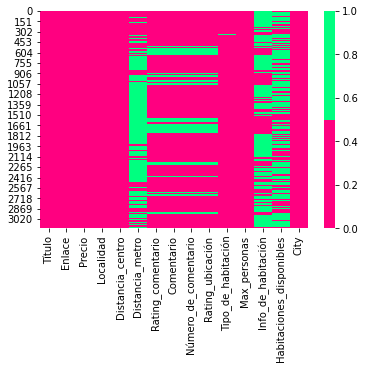

In [16]:
cols = Top10_Cities_US.columns[:15] # primeras 15 columnas
colours = ['#ff0080', '#00ff80'] # especificamos los colores - rosa es no missing, verde es missing
sns.heatmap(Top10_Cities_US[cols].isnull(), cmap=sns.color_palette(colours))

#####  Porcentaje de missing values

Podemos ver a continuación el porcentaje de missing values que tiene cada una de las variables. Para ello, iteramos sobre un
bucle for por cada una de las columnas de nuestro dataset.

Título - 0%
Enlace - 0%
Precio - 0%
Localidad - 0%
Distancia_centro - 0%
Distancia_metro - 71%
Rating_comentario - 19%
Comentario - 19%
Número_de_comentario - 19%
Rating_ubicación - 19%
Tipo_de_habitación - 0%
Max_personas - 0%
Info_de_habitación - 61%
Habitaciones_disponibles - 58%
City - 0%


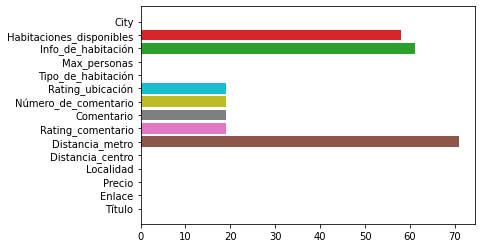

In [17]:
for col in Top10_Cities_US.columns:
    pct_missing = np.mean(Top10_Cities_US[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

Otra forma para ver el número de missings es usando Feature Selector (). Realizo el ejemplo a continuación llamando al proceso con nuestra base de datos principal

In [18]:
fs = FeatureSelector(data = Top10_Cities_US, labels = Top10_Cities_US.columns)

Muestro solo las variables que tienen más de un 80% de valores perdidos. Podemos ver que no tenemos variables con más del 80% de missings

In [19]:
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



Este es otro método para ver el porcentaje de missings de las variables que contienen missings

In [20]:
fs.missing_stats.head()

,missing_fraction
Distancia_metro,0.708716
Info_de_habitación,0.610460
Habitaciones_disponibles,0.584469
Rating_comentario,0.191442
Comentario,0.191442


Creamos un histograma con la distribución de los valores missings.

#### Histograma con missing data

created missing indicator for: Distancia_metro
created missing indicator for: Rating_comentario
created missing indicator for: Comentario
created missing indicator for: Número_de_comentario
created missing indicator for: Rating_ubicación
created missing indicator for: Tipo_de_habitación
created missing indicator for: Info_de_habitación
created missing indicator for: Habitaciones_disponibles


<AxesSubplot:xlabel='index'>

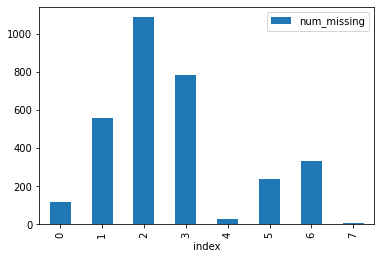

In [21]:
Top10_Cities_US_missings=Top10_Cities_US.copy()
for col in Top10_Cities_US_missings.columns:
    missing = Top10_Cities_US_missings[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        Top10_Cities_US_missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Top10_Cities_US_missings.columns if 'ismissing' in col]

Top10_Cities_US_missings['num_missing'] = Top10_Cities_US_missings[ismissing_cols].sum(axis=1)

Top10_Cities_US_missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Este histograma ayuda a identificar las situaciones de valores perdidos. Por ejemplo, hay más de 1000 instancias con dos valores perdidos y cerca de 800 instancias con tres valores perdidos. También vemos que hay una mínima cantidad con 7 valores perdidos

### ¿Dejar o no dejar la instancia?

A continuación estudiaremos las filas que tienen muchos missings values. Supongo que si tienen más de 12 missings values esa fila ya no aportaría mucho valor

Vemos que no tenemos ninguna fila con más de 12 valores sin informar

In [22]:
# drop rows with a lot of missing values.
ind_missing = Top10_Cities_US_missings[Top10_Cities_US_missings['num_missing'] > 12].index
df_less_missing_rows = Top10_Cities_US_missings.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)

(3155, 24)


### ¿Dejar o no dejar la característica?

Con la siguiente función, comprobamos qué variables tenemos con más de un 80% de missings. Podemos ver, que no tengo ninguna
variable con más de un 80% de missing

In [23]:
def filter_na(datos, nivelna = 0.8): # Porcentaje de missings por el que queremos filtrar
    por_na = datos.isnull().mean() # calculamos la media
    names =list(por_na[por_na < nivelna].index) #elimina las variables <= que ese valor
    return pd.DataFrame(datos.filter(names, axis = 1))

Top10_Cities_US=filter_na(Top10_Cities_US) #devuelve el dataset filtrado

print(Top10_Cities_US.shape)

(3155, 15)


Vemos si nuestro dataset está balanceado por ciudades. Para ello vemos el número de filas que tenemos de cada ciudad.
Como podemos ver, el dataset está un poco desbalanceado, ya que por ejemplo, de Anaheim solo hay 137 filas mientras que de 
Orlando tenemos 568. Podemos usar técnicas de oversampling para aumentar el número de registros de Anaheim a la hora
de querer más datos para entrenar el modelo.

In [24]:
Top10_Cities_US.groupby(['City'])['City'].count()

City
Anaheim          137
Atlanta          437
Chicago          291
Filadelfia       202
Las Vegas        241
Los Angeles      466
NYC              345
Orlando          568
San Diego        267
San Francisco    201
Name: City, dtype: int64

<AxesSubplot:>

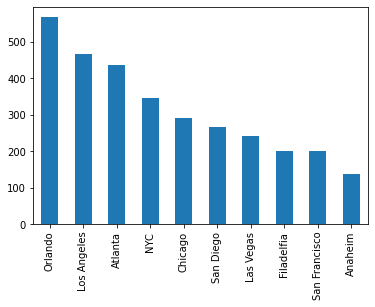

In [25]:
# bar chart -  distribution of a categorical variable
Top10_Cities_US['City'].value_counts().plot.bar()

Estudiamos las variables que tienen una correlación lineal superior al 70%
Vemos que hay dos variables numéricas que están muy correlacionadas entre sí

In [26]:
fs.identify_collinear(correlation_threshold=0.7)

1 features with a correlation magnitude greater than 0.70.



Las dos variables que están muy correlacionadas entre sí son Rating_ubicación y Rating_comentario, que están directamente 
relacionadas por lo que lo tendremos en cuenta para posteriormente, cuando añadamos el resto de variables (de tablas externas)
eliminarla ya que sería redundante (esto lo hago en uno de los pasos finales, tras haber analizado más el dataset)

In [27]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,Rating_ubicación,Rating_comentario,1.0


Comienzo a transformar el formato de las variables del dataset para poder realizar un mejor estudio de las correlaciones entre variables, ya que tengo muchas variables que no son numéricas y quiero transformarlas a numéricas para poder analizarlas mejor.

Eliminamos el símbolo de dolar de la columna precio y reemplazamos la coma por punto para que lo tome como decimal

In [28]:
Top10_Cities_US['Precio $'] = Top10_Cities_US['Precio'].str[3:]
Top10_Cities_US['Precio $']=Top10_Cities_US['Precio $'].str.replace('.','')
Top10_Cities_US['Precio $']=Top10_Cities_US['Precio $'].str.replace(',','.')
Top10_Cities_US['Precio $']=pd.to_numeric(Top10_Cities_US['Precio $'])
Top10_Cities_US=Top10_Cities_US.drop(['Precio'], axis = 1)
Top10_Cities_US

<ipython-input-28-fe09cb8cbc32>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



,Título,Enlace,Localidad,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,"Midtown East, Nueva York",a 1.6 km del centro,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,"Manhattan, Nueva York",a 0.3 km del centro,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,"Wall Street - Distrito financiero, Nueva York",a 7 km del centro,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,"Midtown West, Nueva York",a 1 km del centro,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,"Manhattan, Nueva York",a 1.3 km del centro,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,a 7 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,"Union Square, San Francisco",a 600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,a 3.5 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,"Distrito financiero, San Francisco",a 750 m del centro,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0


Dividimos la columna localidad y le damos el nombre de la zona

In [29]:
Top10_Cities_US["Localidad"]= Top10_Cities_US["Localidad"].str.split(",", n = 1, expand = True)
Top10_Cities_US=Top10_Cities_US.rename(columns={"Localidad": "Zona"})
Top10_Cities_US

,Título,Enlace,Zona,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,a 1.6 km del centro,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,a 0.3 km del centro,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,a 7 km del centro,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,a 1 km del centro,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,a 1.3 km del centro,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,a 7 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,a 600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,a 3.5 km del centro,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,a 750 m del centro,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0


Limpiamos variable de distancia_centro, para quedarnos solo con el valor numérico. Eliminamos el texto de km del centro y los símbolos que no son numéricos

In [30]:
Top10_Cities_US['Distancia_centro'] = Top10_Cities_US['Distancia_centro'].str.replace(' km del centro', '')
Top10_Cities_US['Distancia_centro'] = Top10_Cities_US['Distancia_centro'].str.replace('a ', '')
Top10_Cities_US

,Título,Enlace,Zona,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,1.6,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,0.3,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,7,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,1,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,1.3,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,7,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,3.5,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,750 m del centro,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0


Tenemos que transformar todas las distancias a metros, para ello, tengo que pasar las distancias de km a metros.
Las trato en diferentes columnas por simplicidad de cálculos

In [31]:
Top10_Cities_US[['Distancia_centro_m', 'Medida']] = Top10_Cities_US['Distancia_centro'] .str.split(" ", n = 1, expand = True)
Top10_Cities_US

,Título,Enlace,Zona,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_centro_m,Medida
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,1.6,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0,1.6,None
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,0.3,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0,0.3,None
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,7,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0,7,None
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,1,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0,1,None
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,1.3,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0,1.3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,7,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7,None
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0,600,m del centro
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,3.5,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3.5,None
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,750 m del centro,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750,m del centro


In [32]:
Top10_Cities_US['Distancia_centro_m']=pd.to_numeric(Top10_Cities_US['Distancia_centro_m'])
Top10_Cities_US

,Título,Enlace,Zona,Distancia_centro,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_centro_m,Medida
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,1.6,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0,1.6,None
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,0.3,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0,0.3,None
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,7,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0,7.0,None
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,1,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0,1.0,None
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,1.3,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0,1.3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,7,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7.0,None
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,600 m del centro,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0,600.0,m del centro
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,3.5,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3.5,None
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,750 m del centro,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0,m del centro


In [33]:
Top10_Cities_US['Distancia_alcentro_Km']= np.where((Top10_Cities_US['Medida'] == "m del centro") ,
                           Top10_Cities_US['Distancia_centro_m']/1000,  
                           Top10_Cities_US['Distancia_centro_m']) 

Top10_Cities_US=Top10_Cities_US.drop(["Distancia_centro_m", "Medida", "Distancia_centro"], axis=1)
Top10_Cities_US

,Título,Enlace,Zona,Distancia_metro,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_Km
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,La estación de 51st Street está a menos de 150...,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0,1.60
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,La estación de 57th Street-7th Avenue está a m...,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0,0.30
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,La estación de Wall Street está a menos de 250...,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0,7.00
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,La estación de 42nd Street-Port Authority Bus ...,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0,1.00
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,La estación de 5th Avenue está a menos de 300 ...,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7.00
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0,0.60
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3.50
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,0.75


A continuación ponemos las distancias en metros. Como podemos ver, solo extraemos el número y después realizamos la conversión a kilómetros de nuevo pues es más visual y menos probable a error al analizarlo por ser números menores

In [34]:
Top10_Cities_US['Distancia_metro']=Top10_Cities_US['Distancia_metro'].str.extract('(\d+)')
Top10_Cities_US=Top10_Cities_US.rename(columns={"Distancia_metro": "Distancia_metro_en_metros"})
Top10_Cities_US['Distancia_metro_en_metros']=pd.to_numeric(Top10_Cities_US['Distancia_metro_en_metros'])


Top10_Cities_US['Distancia_alcentro_Km']=Top10_Cities_US['Distancia_alcentro_Km']*1000
Top10_Cities_US=Top10_Cities_US.rename(columns={"Distancia_alcentro_Km": "Distancia_alcentro_enmetros"})
Top10_Cities_US['Distancia_alcentro_enmetros']=pd.to_numeric(Top10_Cities_US['Distancia_alcentro_enmetros'])
Top10_Cities_US

# Ya tenemos las distancias en metros

,Título,Enlace,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,https://www.booking.com/hotel/us/affinia-50.es...,Midtown East,51.0,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0,1600.0
1,The Manhattan Club\n\nSe abre en una ventana n...,https://www.booking.com/hotel/us/the-manhattan...,Manhattan,57.0,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0,300.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,https://www.booking.com/hotel/us/gild-hall-tho...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0,7000.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,https://www.booking.com/hotel/us/riu-plaza-new...,Midtown West,42.0,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0,1000.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,https://www.booking.com/hotel/us/club-quarters...,Manhattan,5.0,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,https://www.booking.com/hotel/us/martonys-zen-...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7000.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,https://www.booking.com/hotel/us/usa-hostels-s...,Union Square,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0,600.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,https://www.booking.com/hotel/us/chic-full-flo...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3500.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,https://www.booking.com/hotel/us/pacific-trade...,Distrito financiero,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0


Eliminamos el Enlace pues es simplemente una URL y no aporta valor en nuestro análisis (criterio experto)

In [35]:
Top10_Cities_US=Top10_Cities_US.drop(["Enlace"], axis=1)
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655 comentarios,8.3,Habitación con cama extragrande - Adaptada par...,Máx. personas: 2,NaN,NaN,NYC,383.0,1600.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,"1,547 comentarios",8.4,Suite Metropolitan,Máx. personas: 2,Suite privada ­,Solo quedan 2 a este precio en nuestra web,NYC,598.0,300.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553 comentarios,8.9,Habitación con cama extragrande.,Máx. personas: 2,NaN,Solo queda 1 habitación a este precio en nuest...,NYC,438.0,7000.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,"4,726 comentarios",8.6,Habitación Deluxe - 1 cama grande,Máx. personas: 2,NaN,Solo quedan 5 habitaciones a este precio en nu...,NYC,287.0,1000.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,"1,522 comentarios",8.5,Habitación Individual Pequeña,Máx. personas: 2,NaN,NaN,NYC,258.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7000.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,"1,473 comentarios",8.4,Habitación Doble Privada con litera y baño com...,Máx. personas: 2,NaN,NaN,San Francisco,130.0,600.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,Máx. personas: 4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3500.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7 comentarios,9.1,Cama en habitación compartida mixta de 8 camas,Máx. personas: 1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0


Ahora limpio la variable habitaciones_disponibles, max_personas y número_de_comentario, quedándonos solo con el número que posee pues es la información que nos va a aportar valor a nuestro análisis

In [36]:
Top10_Cities_US.Habitaciones_disponibles=Top10_Cities_US.Habitaciones_disponibles.str.extract('(\d+)')
Top10_Cities_US['Habitaciones_disponibles']=pd.to_numeric(Top10_Cities_US['Habitaciones_disponibles'])

Top10_Cities_US.Max_personas=Top10_Cities_US.Max_personas.str.extract('(\d+)')
Top10_Cities_US['Max_personas']=pd.to_numeric(Top10_Cities_US['Max_personas'])

Top10_Cities_US.Número_de_comentario=Top10_Cities_US.Número_de_comentario.str.extract('(\d+)')
Top10_Cities_US['Número_de_comentario']=pd.to_numeric(Top10_Cities_US['Número_de_comentario'])

Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,NaN,NYC,383.0,1600.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,2.0,NYC,598.0,300.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,1.0,NYC,438.0,7000.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,5.0,NYC,287.0,1000.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,NaN,NYC,258.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1161.0,7000.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,NaN,San Francisco,130.0,600.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,Apartamento entero ­\n•­\n2 dormitorios\n•­\n1...,NaN,San Francisco,1650.0,3500.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0


Limpiamos la variable Info_de_habitacion, reemplazando los caractéres especiales por vacíos

In [37]:
Top10_Cities_US['Info_de_habitación']=Top10_Cities_US['Info_de_habitación'].str.replace('­\n•­\n',',')
Top10_Cities_US['Info_de_habitación']=Top10_Cities_US['Info_de_habitación'].str.replace('\n•­\n',',')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,NaN,NYC,383.0,1600.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,2.0,NYC,598.0,300.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,1.0,NYC,438.0,7000.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,5.0,NYC,287.0,1000.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,NaN,NYC,258.0,1300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1161.0,7000.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,NaN,San Francisco,130.0,600.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1650.0,3500.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0


A continuación, queremos saber el número de dormitorios, de salas de estar y de baños que tenemos.
Para ello, tenemos que coger el número que está pegado a dormitorio, el número pegado a sala y el número pegado a baños, con lo cuál uso la función extract.
Después borramos las palabras y solo nos quedamos con los números, pues es lo que va a aportar valor a nuestro análisis.

In [38]:
Top10_Cities_US['Numero_dormitorios'] = Top10_Cities_US['Info_de_habitación'].str.extract(r'(\d{1}\s+dormitorio)', expand=False).str.strip()
Top10_Cities_US['Numero_SaladeEstar'] = Top10_Cities_US['Info_de_habitación'].str.extract(r'(\d{1}\s+sala)', expand=False).str.strip()
Top10_Cities_US['Numero_baños'] = Top10_Cities_US['Info_de_habitación'].str.extract(r'(\d{1}\s+baño)', expand=False).str.strip()


Top10_Cities_US['Numero_dormitorios'] = Top10_Cities_US['Numero_dormitorios'].str.replace('dormitorio', '')
Top10_Cities_US['Numero_dormitorios']=pd.to_numeric(Top10_Cities_US['Numero_dormitorios'])

Top10_Cities_US['Numero_SaladeEstar'] = Top10_Cities_US['Numero_SaladeEstar'].str.replace('sala', '')
Top10_Cities_US['Numero_SaladeEstar']=pd.to_numeric(Top10_Cities_US['Numero_SaladeEstar'])

Top10_Cities_US['Numero_baños'] = Top10_Cities_US['Numero_baños'].str.replace('baño', '')
Top10_Cities_US['Numero_baños']=pd.to_numeric(Top10_Cities_US['Numero_baños'])

Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,NaN,NYC,383.0,1600.0,NaN,NaN,NaN
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,2.0,NYC,598.0,300.0,NaN,NaN,NaN
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,1.0,NYC,438.0,7000.0,NaN,NaN,NaN
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,5.0,NYC,287.0,1000.0,NaN,NaN,NaN
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,NaN,NYC,258.0,1300.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1161.0,7000.0,2.0,1.0,2.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,NaN,San Francisco,130.0,600.0,NaN,NaN,NaN
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1650.0,3500.0,2.0,1.0,1.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0,NaN,NaN,NaN


Imputo los NA como habitaciones estándar pues son las más comunes.

In [39]:
Top10_Cities_US['Tipo_de_habitación']=Top10_Cities_US['Tipo_de_habitación'].fillna('Estándar')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,NaN,NYC,383.0,1600.0,NaN,NaN,NaN
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,2.0,NYC,598.0,300.0,NaN,NaN,NaN
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,1.0,NYC,438.0,7000.0,NaN,NaN,NaN
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,5.0,NYC,287.0,1000.0,NaN,NaN,NaN
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,NaN,NYC,258.0,1300.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1161.0,7000.0,2.0,1.0,2.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,NaN,San Francisco,130.0,600.0,NaN,NaN,NaN
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,"Apartamento entero ,2 dormitorios,1 sala de es...",NaN,San Francisco,1650.0,3500.0,2.0,1.0,1.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,NaN,San Francisco,158.0,750.0,NaN,NaN,NaN


Homogeneizamos los nombres de las habitaciones ya que hay muchos nombres que son sinónimos y queremos formar grupos de los 
más comunes, con características similares. Aplico criterio experto, ya que individual y estándar se entienden igual que basic
por ejemplo.

In [40]:
Habitacion_Estandar=['Individual', 'Estándar', 'compartido', 'Basic', 'Estandar']
Habitacion_Superior=['extragrande', 'suite', 'Deluxe', 'deluxe','vistas', 'Executive', 'Suite', 'VIP', 'Lujo' ]
Estudio= ['Estudio']
Apartamento= ['Apartamento']

In [41]:
# Creo las columnas de cada tipo de habitación para luego añadir la información correspondiente.

Top10_Cities_US['Habitacion_Estandar']=''
Top10_Cities_US['Habitacion_Superior']=''
Top10_Cities_US['Estudio']=''
Top10_Cities_US['Apartamento']=''


Recorro las filas, si contienen las palabras asociadas a habitación estándar, habitación superior, estudio o apartamento,
la columna nueva creada tendrá un 1 si se da el caso y un 0 si no. (Variables dummy)

In [42]:
for item in Habitacion_Estandar:
    Top10_Cities_US['Habitacion_Estandar'][Top10_Cities_US['Tipo_de_habitación'].str.contains(item)]=1
    
for item in Habitacion_Superior:
    Top10_Cities_US['Habitacion_Superior'][Top10_Cities_US['Tipo_de_habitación'].str.contains(item)]=1
    
for item in Estudio:
    Top10_Cities_US['Estudio'][Top10_Cities_US['Tipo_de_habitación'].str.contains(item)]=1

for item in Apartamento:
    Top10_Cities_US['Apartamento'][Top10_Cities_US['Tipo_de_habitación'].str.contains(item)]=1

Top10_Cities_US

<ipython-input-42-f7c82aecdfb1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f7c82aecdfb1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f7c82aecdfb1>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-f7c82aecdfb1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,...,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,Habitacion_Estandar,Habitacion_Superior,Estudio,Apartamento
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,...,NYC,383.0,1600.0,NaN,NaN,NaN,,1,,
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,...,NYC,598.0,300.0,NaN,NaN,NaN,,1,,
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,...,NYC,438.0,7000.0,NaN,NaN,NaN,,1,,
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,...,NYC,287.0,1000.0,NaN,NaN,NaN,,1,,
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,...,NYC,258.0,1300.0,NaN,NaN,NaN,1,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,"Apartamento entero ,2 dormitorios,1 sala de es...",...,San Francisco,1161.0,7000.0,2.0,1.0,2.0,,,,1
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,...,San Francisco,130.0,600.0,NaN,NaN,NaN,1,,,
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,"Apartamento entero ,2 dormitorios,1 sala de es...",...,San Francisco,1650.0,3500.0,2.0,1.0,1.0,,,,1
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,...,San Francisco,158.0,750.0,NaN,NaN,NaN,,,,


In [43]:
# Cuando haya palabras relacionadas con la habitación estándar y la habitación superior, dejo estándar porque tras leer
# la descripción las características se asemejan más a estándar

Top10_Cities_US['Habitacion_Superior_final']= np.where(((Top10_Cities_US['Habitacion_Estandar'] == 1)
                          & (Top10_Cities_US['Habitacion_Superior'] ==1)),0, Top10_Cities_US['Habitacion_Superior'] )

# Cuando haya palabras relacionadas con estudio y apartamento, dejo estudio porque tras leer
# la descripción las características se asemejan más a estudio

# En el caso de que sea estudio o apartamento y tenga references a ser superior, se mantienen las dos, habitación superior
# y apartamento/estudio ya que sería un apartamento de lujo o un estudio de lujo

Top10_Cities_US['Apartamento_Final']= np.where(((Top10_Cities_US['Estudio'] == 1)
                          & (Top10_Cities_US['Apartamento'] ==1)),0, Top10_Cities_US['Apartamento'] )


# Quito la columna de la habitación superior antigua y renombro la nueva.

Top10_Cities_US=Top10_Cities_US.drop(['Habitacion_Superior'], axis = 1)
Top10_Cities_US=Top10_Cities_US.rename(columns={"Habitacion_Superior_final": "Habitacion_Superior"})


Top10_Cities_US=Top10_Cities_US.drop(['Apartamento'], axis = 1)
Top10_Cities_US=Top10_Cities_US.rename(columns={"Apartamento_Final": "Apartamento"})

# Cambiamos el formato de las columnas a numérico

Top10_Cities_US['Habitacion_Superior']=pd.to_numeric(Top10_Cities_US['Habitacion_Superior'])
Top10_Cities_US['Apartamento']=pd.to_numeric(Top10_Cities_US['Apartamento'])
Top10_Cities_US['Estudio']=pd.to_numeric(Top10_Cities_US['Estudio'])
Top10_Cities_US['Habitacion_Estandar']=pd.to_numeric(Top10_Cities_US['Habitacion_Estandar'])

Top10_Cities_US["suma_habitaciones_apartamento_estudio"]= Top10_Cities_US.iloc[:, -4:-1].sum(axis=1)


Top10_Cities_US['Habitacion_Estandar_Final']= np.where((Top10_Cities_US["suma_habitaciones_apartamento_estudio"] == 0), 1, Top10_Cities_US['Habitacion_Estandar'])
Top10_Cities_US=Top10_Cities_US.drop(['Habitacion_Estandar'], axis = 1)
Top10_Cities_US=Top10_Cities_US.rename(columns={"Habitacion_Estandar_Final": "Habitacion_Estandar"})
Top10_Cities_US=Top10_Cities_US.drop(['suma_habitaciones_apartamento_estudio'], axis = 1)

Top10_Cities_US['Estudio']=Top10_Cities_US['Estudio'].fillna(0)
Top10_Cities_US['Habitacion_Superior']=Top10_Cities_US['Habitacion_Superior'].fillna(0)
Top10_Cities_US['Apartamento']=Top10_Cities_US['Apartamento'].fillna(0)
Top10_Cities_US['Habitacion_Estandar']=Top10_Cities_US['Habitacion_Estandar'].fillna(0)
Top10_Cities_US['Numero_dormitorios']=Top10_Cities_US['Numero_dormitorios'].fillna(1)


#Reemplazo con la moda ya que considero que es el método más adecuado para este dataset, ya que la moda en el tipo de habitación es lo más común y lo más demandado
Top10_Cities_US['Numero_baños'].fillna(Top10_Cities_US['Numero_baños'].mode()[0], inplace=True)
Top10_Cities_US['Numero_dormitorios'].fillna(Top10_Cities_US['Numero_dormitorios'].mode()[0], inplace=True)
Top10_Cities_US['Numero_SaladeEstar'].fillna(Top10_Cities_US['Numero_SaladeEstar'].mode()[0], inplace=True)
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Comentario,Número_de_comentario,Rating_ubicación,Tipo_de_habitación,Max_personas,Info_de_habitación,...,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,Estudio,Habitacion_Superior,Apartamento,Habitacion_Estandar
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,Muy bien,655.0,8.3,Habitación con cama extragrande - Adaptada par...,2,NaN,...,NYC,383.0,1600.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,Muy bien,1.0,8.4,Suite Metropolitan,2,Suite privada ­,...,NYC,598.0,300.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,Fabuloso,553.0,8.9,Habitación con cama extragrande.,2,NaN,...,NYC,438.0,7000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,Fabuloso,4.0,8.6,Habitación Deluxe - 1 cama grande,2,NaN,...,NYC,287.0,1000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,Muy bien,1.0,8.5,Habitación Individual Pequeña,2,NaN,...,NYC,258.0,1300.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,2,"Apartamento entero ,2 dormitorios,1 sala de es...",...,San Francisco,1161.0,7000.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,Muy bien,1.0,8.4,Habitación Doble Privada con litera y baño com...,2,NaN,...,San Francisco,130.0,600.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,NaN,Apartamento de 2 dormitorios,4,"Apartamento entero ,2 dormitorios,1 sala de es...",...,San Francisco,1650.0,3500.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,Fantástico,7.0,9.1,Cama en habitación compartida mixta de 8 camas,1,2 camas en habitación compartida ­,...,San Francisco,158.0,750.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [44]:
#Eliminamos las columnas antiguas pues ya hemos realizado la transformación y no son necesarias
# Comentario lo elimino porque ya tengo el rating del comentario en forma numérica. Esta variable no es necesaria hacerla dummy
# ya que al ser un ranking, los números tienen diferente importancia entre ellos, por lo que la variable numérica nos vale.

Top10_Cities_US=Top10_Cities_US.drop(['Tipo_de_habitación', 'Info_de_habitación', 'Comentario'], axis=1)
Top10_Cities_US


,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,Estudio,Habitacion_Superior,Apartamento,Habitacion_Estandar
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,NaN,NYC,383.0,1600.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,300.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,7000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,1000.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,NaN,NYC,258.0,1300.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,NaN,NaN,NaN,NaN,2,NaN,San Francisco,1161.0,7000.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,NaN,8.4,1.0,8.4,2,NaN,San Francisco,130.0,600.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,NaN,NaN,NaN,NaN,4,NaN,San Francisco,1650.0,3500.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,NaN,9.1,7.0,9.1,1,NaN,San Francisco,158.0,750.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [45]:
#Imputamos los valores missings. He considerado, por criterio experto, que el mejor método de imputación para este caso 
# es la moda, ya que normalmente priman los hoteles del mismo tipo y los menos demandados son los muy caros o muy baratos

Top10_Cities_US['Distancia_metro_en_metros'].fillna(Top10_Cities_US['Distancia_metro_en_metros'].mode()[0], inplace=True)
Top10_Cities_US['Rating_comentario'].fillna(Top10_Cities_US['Rating_comentario'].mode()[0], inplace=True)
Top10_Cities_US['Número_de_comentario'].fillna(Top10_Cities_US['Número_de_comentario'].mode()[0], inplace=True)
Top10_Cities_US['Rating_ubicación'].fillna(Top10_Cities_US['Rating_ubicación'].mode()[0], inplace=True)
Top10_Cities_US['Max_personas'].fillna(Top10_Cities_US['Max_personas'].mode()[0], inplace=True)
Top10_Cities_US['Habitaciones_disponibles'].fillna(Top10_Cities_US['Habitaciones_disponibles'].mode()[0], inplace=True)

Ahora quiero añadir variables extras a mi dataset, para que añadan valor a nuestra predicción y podamos extraer conclusiones
basándonos en más variables con valor.

Este dataset no tiene valores missings, los hemos cogido manualmente de las siguientes páginas webs:

Metrics: https://www.numbeo.com/cost-of-living/region_rankings_current.jsp?region=019

Salarios: https://www.statista.com/statistics/205609/median-household-income-in-the-top-20-most-populated-cities-in-the-us/

Salario Irvine: https://www.bestplaces.net/economy/city/california/irvine

Salario Atlanta: https://datausa.io/profile/geo/atlanta-ga/

Salario Las Vegas: https://datausa.io/profile/geo/las-vegas-nv

Salario Orlando: https://www.census.gov/quickfacts/fact/table/orlandocityflorida/PST040219

Trafico: https://www.numbeo.com/traffic/region_rankings.jsp?title=2021&region=021



In [46]:
Cost_Of_Living  = pd.read_excel("Cost of living.xlsx", header=0, parse_dates=True, index_col=0)
Cost_Of_Living=Cost_Of_Living.reset_index()
Cost_Of_Living

,Rank Cost of living overall,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Crime Index,Safety Index,Rank crime index,Health Care Index,Health Care Exp. Index,Rank health index
0,15,"New York, NY, United States",100.00,100.00,100.00,100.00,100.00,100.00,46.96,53.04,49,61.64,114.61,58.0
1,22,"San Francisco, CA, United States",94.45,120.19,106.37,97.60,92.89,115.10,56.12,43.88,24,65.17,120.63,50.0
2,91,"Philadelphia, PA, United States",80.18,49.01,65.75,83.43,71.18,82.65,61.51,38.49,15,69.38,127.06,35.0
3,92,"Los Angeles, CA, United States",80.01,75.17,77.77,75.87,90.38,102.82,48.41,51.59,43,61.33,113.19,59.0
4,98,"Irvine, CA, United States",79.34,73.18,76.49,74.14,82.36,118.65,18.57,81.43,92,NaN,NaN,NaN
5,116,"Chicago, IL, United States",78.45,59.01,69.45,72.98,78.57,112.69,64.81,35.19,7,66.41,123.09,45.0
6,138,"San Diego, CA, United States",76.54,70.67,73.82,74.56,79.01,112.46,36.51,63.49,72,70.15,130.34,31.0
7,143,"Atlanta, GA, United States",76.26,51.30,64.70,78.26,64.56,121.17,62.00,38.00,14,67.34,125.89,42.0
8,231,"Las Vegas, NV, United States",69.90,38.17,55.21,61.07,77.23,107.07,56.19,43.81,23,55.81,100.06,62.0
9,256,"Orlando, FL, United States",67.43,42.49,55.88,64.78,68.56,103.90,51.93,48.07,33,62.50,114.22,57.0


Homogeneizo el nombre de las ciudades para poder realizar el cruce entre las tablas. Para ello, han de ser exactamente iguales.

Para realizar el reemplazo, utilizo la función replace

In [47]:
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['New York, NY, United States'] ,'NYC')
Cost_Of_Living['City']= Cost_Of_Living['City'].replace(['Chicago, IL, United States'],'Chicago')
Cost_Of_Living['City']= Cost_Of_Living['City'].replace(['Irvine, CA, United States'],'Anaheim')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['Atlanta, GA, United States'],'Atlanta')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['Philadelphia, PA, United States'],'Filadelfia')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['Las Vegas, NV, United States'],'Las Vegas')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['Los Angeles, CA, United States'] ,'Los Angeles')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['Orlando, FL, United States'],'Orlando')
Cost_Of_Living['City']= Cost_Of_Living['City'].replace(['San Diego, CA, United States'],'San Diego')
Cost_Of_Living['City'] = Cost_Of_Living['City'].replace(['San Francisco, CA, United States'],'San Francisco')
Cost_Of_Living['Health Care Index'].fillna(Cost_Of_Living['Health Care Index'].mode()[0], inplace=True)
Cost_Of_Living['Health Care Exp. Index'].fillna(Cost_Of_Living['Health Care Exp. Index'].mode()[0], inplace=True)
Cost_Of_Living['Rank health index'].fillna(Cost_Of_Living['Rank health index'].mode()[0], inplace=True)
Cost_Of_Living

,Rank Cost of living overall,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Crime Index,Safety Index,Rank crime index,Health Care Index,Health Care Exp. Index,Rank health index
0,15,NYC,100.00,100.00,100.00,100.00,100.00,100.00,46.96,53.04,49,61.64,114.61,58.0
1,22,San Francisco,94.45,120.19,106.37,97.60,92.89,115.10,56.12,43.88,24,65.17,120.63,50.0
2,91,Filadelfia,80.18,49.01,65.75,83.43,71.18,82.65,61.51,38.49,15,69.38,127.06,35.0
3,92,Los Angeles,80.01,75.17,77.77,75.87,90.38,102.82,48.41,51.59,43,61.33,113.19,59.0
4,98,Anaheim,79.34,73.18,76.49,74.14,82.36,118.65,18.57,81.43,92,55.81,100.06,31.0
5,116,Chicago,78.45,59.01,69.45,72.98,78.57,112.69,64.81,35.19,7,66.41,123.09,45.0
6,138,San Diego,76.54,70.67,73.82,74.56,79.01,112.46,36.51,63.49,72,70.15,130.34,31.0
7,143,Atlanta,76.26,51.30,64.70,78.26,64.56,121.17,62.00,38.00,14,67.34,125.89,42.0
8,231,Las Vegas,69.90,38.17,55.21,61.07,77.23,107.07,56.19,43.81,23,55.81,100.06,62.0
9,256,Orlando,67.43,42.49,55.88,64.78,68.56,103.90,51.93,48.07,33,62.50,114.22,57.0


Ahora las ciudades se llaman igual en ambas tablas por lo que procedo a realizar el cruce de ambas tablas, haciendo un left join
sobre la tabla principal (Top10_Cities_US)

In [48]:
Top10_Cities_US=Top10_Cities_US.merge(Cost_Of_Living, on='City', how='left')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Crime Index,Safety Index,Rank crime index,Health Care Index,Health Care Exp. Index,Rank health index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0


In [49]:
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Crime Index,Safety Index,Rank crime index,Health Care Index,Health Care Exp. Index,Rank health index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,100.00,100.0,100.00,100.0,46.96,53.04,49,61.64,114.61,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,106.37,97.6,92.89,115.1,56.12,43.88,24,65.17,120.63,50.0


In [50]:
# Realizamos lo mismo para el dataset de los Scores by city

Scores_byCity  = pd.read_excel("Scores by city.xlsx", header=0, parse_dates=True, index_col=0,)
Scores_byCity=Scores_byCity.reset_index()
Scores_byCity

,City,Country music score,Remote workers score,Generous city score,Best colleges score,Sport events score,Public transportation score,Best place for staycation score,Mejor ciudad solteros,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score
0,Anaheim,11.81,44.59,21.63,45.66,4.37,57.16,39.48,47.00,60.81,7,51.69,50.41
1,Atlanta,30.85,58.98,33.48,56.22,35.18,56.47,52.50,58.11,54.75,27,52.65,57.68
2,Chicago,13.28,55.06,42.48,48.89,36.86,63.33,57.03,53.56,55.65,94,49.02,57.68
3,Filadelfia,12.34,47.86,32.88,48.95,40.13,48.73,48.33,48.97,45.80,52,45.96,53.56
4,Las Vegas,45.96,49.25,20.03,54.82,24.39,56.06,57.13,57.26,47.04,24,53.42,62.93
5,Los Angeles,13.43,44.68,34.97,50.04,50.87,64.79,53.56,52.04,53.99,8,52.73,60.17
6,NYC,8.56,46.79,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
7,Orlando,22.89,53.82,24.81,59.96,20.67,55.07,60.87,57.07,50.93,27,55.35,70.67
8,San Diego,14.12,43.04,29.12,54.59,19.41,64.13,56.53,56.74,64.17,51,64.07,60.01
9,San Francisco,12.26,43.18,39.61,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89


In [51]:
Top10_Cities_US=Top10_Cities_US.merge(Scores_byCity, on='City', how='left')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Generous city score,Best colleges score,Sport events score,Public transportation score,Best place for staycation score,Mejor ciudad solteros,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,49.61,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,39.61,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,39.61,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,39.61,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,39.61,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89


In [52]:
# Realizamos lo mismo para el dataset de los salarios medianos.

Median_Income  = pd.read_excel("Cost of living.xlsx", header=0, parse_dates=True, index_col=0, sheet_name="Salaries")
Median_Income=Median_Income.reset_index()
Median_Income

,City,Median household income ($)
0,"New York, NY, United States",69407
1,"San Francisco, CA, United States",123859
2,"Philadelphia, PA, United States",47474
3,"Los Angeles, CA, United States",67418
4,"Irvine, CA, United States",91999
5,"Chicago, IL, United States",61811
6,"San Diego, CA, United States",85707
7,"Atlanta, GA, United States",65345
8,"Las Vegas, NV, United States",53575
9,"Orlando, FL, United States",51757


In [53]:
Median_Income['City'] = Median_Income['City'].replace(['New York, NY, United States'] ,'NYC')
Median_Income['City']= Median_Income['City'].replace(['Chicago, IL, United States'],'Chicago')
Median_Income['City']= Median_Income['City'].replace(['Irvine, CA, United States'],'Anaheim')
Median_Income['City'] = Median_Income['City'].replace(['Atlanta, GA, United States'],'Atlanta')
Median_Income['City'] = Median_Income['City'].replace(['Philadelphia, PA, United States'],'Filadelfia')
Median_Income['City'] = Median_Income['City'].replace(['Las Vegas, NV, United States'],'Las Vegas')
Median_Income['City'] = Median_Income['City'].replace(['Los Angeles, CA, United States'] ,'Los Angeles')
Median_Income['City'] = Median_Income['City'].replace(['Orlando, FL, United States'],'Orlando')
Median_Income['City']= Median_Income['City'].replace(['San Diego, CA, United States'],'San Diego')
Median_Income['City'] = Median_Income['City'].replace(['San Francisco, CA, United States'],'San Francisco')
Median_Income

,City,Median household income ($)
0,NYC,69407
1,San Francisco,123859
2,Filadelfia,47474
3,Los Angeles,67418
4,Anaheim,91999
5,Chicago,61811
6,San Diego,85707
7,Atlanta,65345
8,Las Vegas,53575
9,Orlando,51757


In [54]:
Top10_Cities_US=Top10_Cities_US.merge(Median_Income, on='City', how='left')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Best colleges score,Sport events score,Public transportation score,Best place for staycation score,Mejor ciudad solteros,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($)
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87,69407
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87,69407
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87,69407
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87,69407
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,43.65,48.12,68.87,53.52,44.91,50.91,61,53.44,56.87,69407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89,123859
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89,123859
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89,123859
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,50.43,36.09,75.21,59.41,59.88,67.11,58,63.14,67.89,123859


In [55]:
# Realizamos lo mismo para los datos de tráfico.
Traffic  = pd.read_excel("Cost of living.xlsx", header=0, parse_dates=True, index_col=0, sheet_name="Traffic")
Traffic=Traffic.reset_index()
Traffic

,City,Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,"New York, NY, United States",163.91,43.13,2677.94,190.40,3050.43
1,"San Francisco, CA, United States",256.58,51.30,7292.35,578.28,9185.26
2,"Philadelphia, PA, United States",179.41,39.20,1394.13,269.32,7475.45
3,"Los Angeles, CA, United States",340.93,60.63,16590.42,792.47,15212.88
4,"Irvine, CA, United States",340.93,60.63,16590.42,792.47,15212.88
5,"Chicago, IL, United States",191.20,42.07,2278.63,215.27,7520.72
6,"San Diego, CA, United States",156.23,33.80,403.09,204.88,7750.72
7,"Atlanta, GA, United States",204.53,42.18,2318.45,240.57,9739.89
8,"Las Vegas, NV, United States",127.74,27.36,37.70,146.94,6743.38
9,"Orlando, FL, United States",179.49,36.88,871.15,214.26,9694.22


In [56]:
Traffic['City'] = Traffic['City'].replace(['New York, NY, United States'] ,'NYC')
Traffic['City']= Traffic['City'].replace(['Chicago, IL, United States'],'Chicago')
Traffic['City']= Traffic['City'].replace(['Irvine, CA, United States'],'Anaheim')
Traffic['City'] = Traffic['City'].replace(['Atlanta, GA, United States'],'Atlanta')
Traffic['City'] = Traffic['City'].replace(['Philadelphia, PA, United States'],'Filadelfia')
Traffic['City'] = Traffic['City'].replace(['Las Vegas, NV, United States'],'Las Vegas')
Traffic['City'] = Traffic['City'].replace(['Los Angeles, CA, United States'] ,'Los Angeles')
Traffic['City'] = Traffic['City'].replace(['Orlando, FL, United States'],'Orlando')
Traffic['City']= Traffic['City'].replace(['San Diego, CA, United States'],'San Diego')
Traffic['City'] = Traffic['City'].replace(['San Francisco, CA, United States'],'San Francisco')
Traffic

,City,Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,NYC,163.91,43.13,2677.94,190.40,3050.43
1,San Francisco,256.58,51.30,7292.35,578.28,9185.26
2,Filadelfia,179.41,39.20,1394.13,269.32,7475.45
3,Los Angeles,340.93,60.63,16590.42,792.47,15212.88
4,Anaheim,340.93,60.63,16590.42,792.47,15212.88
5,Chicago,191.20,42.07,2278.63,215.27,7520.72
6,San Diego,156.23,33.80,403.09,204.88,7750.72
7,Atlanta,204.53,42.18,2318.45,240.57,9739.89
8,Las Vegas,127.74,27.36,37.70,146.94,6743.38
9,Orlando,179.49,36.88,871.15,214.26,9694.22


In [57]:
Top10_Cities_US=Top10_Cities_US.merge(Traffic, on='City', how='left')
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26


A continuación exporto el dataset donde se ha realizado la unión con las tablas adicionales

In [58]:
Top10_Cities_US.to_excel('Top10_Cities_US_testkdd.xlsx', index = False)

In [59]:
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26


Vemos qué columnas tenemos después de haber unido los diferentes datasets adicionales

In [60]:
Top10_Cities_US.columns

Index(['Título', 'Zona', 'Distancia_metro_en_metros', 'Rating_comentario',
       'Número_de_comentario', 'Rating_ubicación', 'Max_personas',
       'Habitaciones_disponibles', 'City', 'Precio $',
       'Distancia_alcentro_enmetros', 'Numero_dormitorios',
       'Numero_SaladeEstar', 'Numero_baños', 'Estudio', 'Habitacion_Superior',
       'Apartamento', 'Habitacion_Estandar', 'Rank Cost of living overall',
       'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Crime Index', 'Safety Index',
       'Rank crime index', 'Health Care Index', 'Health Care Exp. Index',
       'Rank health index', 'Country music score', 'Remote workers score',
       'Generous city score', 'Best colleges score', 'Sport events score',
       'Public transportation score', 'Best place for staycation score',
       'Mejor ciudad solteros', 'Felicidad score',
       'Rank: Weather four seasons % (1

Ahora voy a usar Feature Selector para el número de missings de nuevo (para haber qué tal ha quedado después de unir las tablas)

In [61]:
fs = FeatureSelector(data = Top10_Cities_US, labels = Top10_Cities_US.columns)

Vemos qué variables del nuevo dataset poseen un número superior al 80% de missings y vemos que no hay ninguna variable,
debido a que previamente habíamos limpiado el dataset base (Top10_Cities_US) y nuestro datasets adicionales no tenían
missing values

In [62]:
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



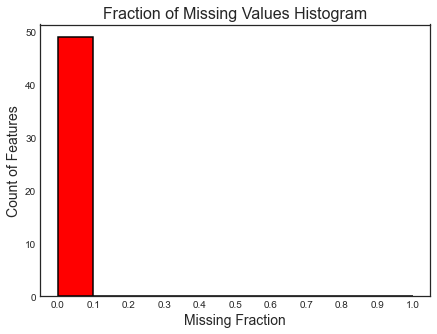

In [63]:
fs.plot_missing()

Confirmamos que no tenemos missings, viendo el porcentaje de missings

In [64]:
Top10_Cities_US.isnull().mean()*100

Título                                              0.0
Zona                                                0.0
Distancia_metro_en_metros                           0.0
Rating_comentario                                   0.0
Número_de_comentario                                0.0
Rating_ubicación                                    0.0
Max_personas                                        0.0
Habitaciones_disponibles                            0.0
City                                                0.0
Precio $                                            0.0
Distancia_alcentro_enmetros                         0.0
Numero_dormitorios                                  0.0
Numero_SaladeEstar                                  0.0
Numero_baños                                        0.0
Estudio                                             0.0
Habitacion_Superior                                 0.0
Apartamento                                         0.0
Habitacion_Estandar                             

Analizamos con el dataset de la unión final, qué variables tienen una correlación lineal superior al 80% y vemos que 12 
variables tienen una correlación superior al 90%. Guardamos esta información para posteriormente, casi al final, elimianr las variables muy correlacionadas o con carencia de importancia

In [65]:
fs.identify_collinear(correlation_threshold=0.9)

13 features with a correlation magnitude greater than 0.90.



In [66]:
collinear_features = fs.ops['collinear']

In [67]:
collinear=fs.record_collinear

A continuación muestro las variables con correlación lineal mayor al 90% entre sí.


In [68]:
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,Rating_ubicación,Rating_comentario,1.000000
13,Health Care Exp. Index,Health Care Index,0.993701
6,Cost of Living Plus Rent Index,Rent Index,0.989382
12,Rank crime index,Safety Index,0.987442
20,Inefficiency index,Time Exp. Index,0.979564
18,Inefficiency index,Traffic Index,0.976420
16,Time Exp. Index,Traffic Index,0.973070
8,Groceries Index,Cost of Living Index,0.963454
15,Time Index (in minutes),Traffic Index,0.960958
5,Cost of Living Plus Rent Index,Cost of Living Index,0.954592


In [69]:
Top10_Cities_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3155 entries, 0 to 3154
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Título                                            3155 non-null   object 
 1   Zona                                              3155 non-null   object 
 2   Distancia_metro_en_metros                         3155 non-null   float64
 3   Rating_comentario                                 3155 non-null   float64
 4   Número_de_comentario                              3155 non-null   float64
 5   Rating_ubicación                                  3155 non-null   float64
 6   Max_personas                                      3155 non-null   int64  
 7   Habitaciones_disponibles                          3155 non-null   float64
 8   City                                              3155 non-null   object 
 9   Precio $           

Podemos ver la correlación lineal entre variables también usando un mapa de calor

Podemos ver que las variables más correlacionadas son el rating del comentario con el rating de la ubicación.  
Las variables que aparecen en rojo en el mapa del calor inferior, son las que más relacionadas están entre sí de forma lineal.
Podemos ver la correlación en valor en la tabla superior

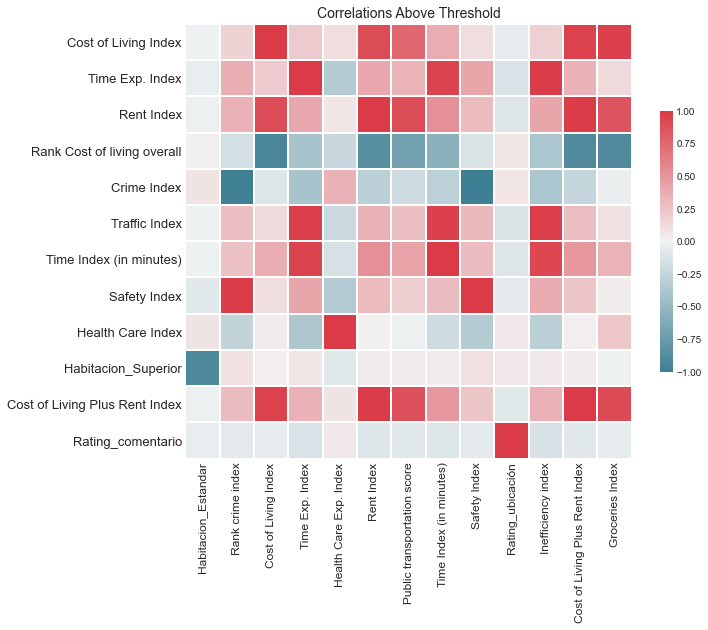

In [70]:
fs.plot_collinear() 

In [71]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,Rating_ubicación,Rating_comentario,1.000000
1,Habitacion_Estandar,Habitacion_Superior,-0.915014
2,Cost of Living Index,Rank Cost of living overall,-0.931016
3,Rent Index,Cost of Living Index,0.901158
4,Cost of Living Plus Rent Index,Rank Cost of living overall,-0.903898
5,Cost of Living Plus Rent Index,Cost of Living Index,0.954592
6,Cost of Living Plus Rent Index,Rent Index,0.989382
7,Groceries Index,Rank Cost of living overall,-0.901973
8,Groceries Index,Cost of Living Index,0.963454
9,Groceries Index,Cost of Living Plus Rent Index,0.909709


In [72]:
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26


### Analizamos outliers

Hacemos un gráfico de boxplot donde se pueden ver fácilmente las variables que tienen mucha variabilidad.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'Distancia_metro_en_metros'),
  Text(1, 0, 'Rating_comentario'),
  Text(2, 0, 'Número_de_comentario'),
  Text(3, 0, 'Rating_ubicación'),
  Text(4, 0, 'Max_personas'),
  Text(5, 0, 'Habitaciones_disponibles'),
  Text(6, 0, 'Precio $'),
  Text(7, 0, 'Distancia_alcentro_enmetros'),
  Text(8, 0, 'Numero_dormitorios'),
  Text(9, 0, 'Numero_SaladeEstar'),
  Text(10, 0, 'Numero_baños'),
  Text(11, 0, 'Estudio'),
  Text(12, 0, 'Habitacion_Superior'),
  Text(13, 0, 'Apartamento'),
  Text(14, 0, 'Habitacion_Estandar'),
  Text(15, 0, 'Rank Cost of living overall'),
  Text(16, 0, 'Cost of Living Index'),
  Text(17, 0, 'Rent Index'),
  Text(18, 0, 'Cost of Living Plus Rent Index'),
  Text(19, 0, 'Groceries Index'),
  Text(20, 0, 'Restaurant Price Index'),
  Text(21, 0, 'Local Pur

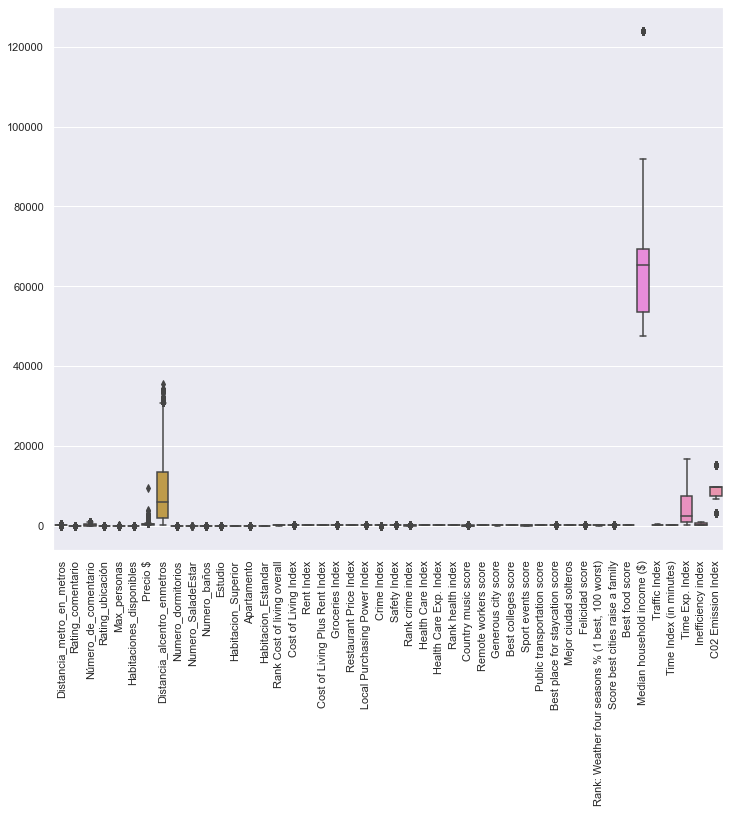

In [73]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=Top10_Cities_US)
plt.xticks(rotation=90)

<AxesSubplot:>

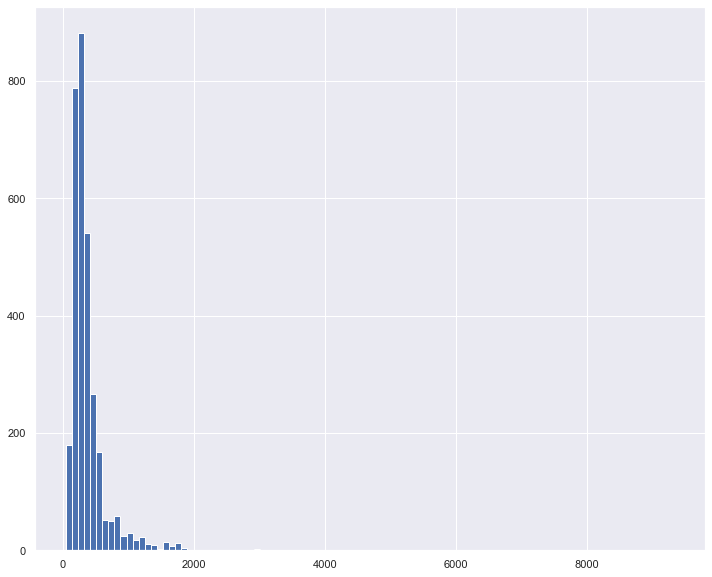

In [74]:
Top10_Cities_US['Precio $'].hist(bins=100)
# La mayoría de los precios se encuentran entre 500 y 1000 dólares la noche

Podemos ver que hay un outlier en el precio, con precio superior a 9000 dólares la noche. Debemos eliminar este registro para
que no perturbe los resultados en nuestro modelo.

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf076c3a00>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf076b3160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf076c3790>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf076b3880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf076b3c10>],
 'means': []}

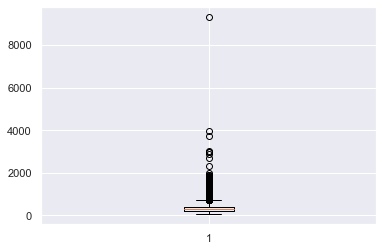

In [75]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

plt.boxplot(Top10_Cities_US['Precio $'])

Procedemos a eliminar el registro que es un outlier

In [76]:
Top10_Cities_US=Top10_Cities_US[Top10_Cities_US['Precio $']<8000]
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Martonys Zen Garden\n\nSe abre en una ventana ...,San Francisco,250.0,8.5,1.0,8.5,2,1.0,San Francisco,1161.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3151,USA Hostels San Francisco\n\nSe abre en una ve...,Union Square,250.0,8.4,1.0,8.4,2,1.0,San Francisco,130.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3152,Chic Full-Floor Edwardian By Dolores Park\n\nS...,San Francisco,250.0,8.5,1.0,8.5,4,1.0,San Francisco,1650.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26
3153,Pacific Tradewinds Hostel\n\nSe abre en una ve...,Distrito financiero,250.0,9.1,7.0,9.1,1,1.0,San Francisco,158.0,...,67.11,58,63.14,67.89,123859,256.58,51.30,7292.35,578.28,9185.26


Vemos que tenemos otro outlier en la variable "Median household income ($)"

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf0729a2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf0729aa00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf0729a070>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf073b1160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf073b14f0>],
 'means': []}

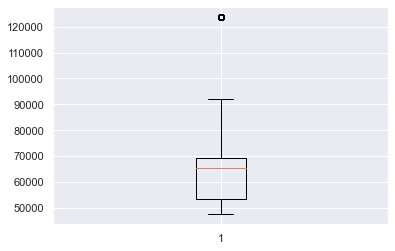

In [77]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

plt.boxplot(Top10_Cities_US['Median household income ($)'])

In [78]:
Top10_Cities_US=Top10_Cities_US[Top10_Cities_US['Median household income ($)']<80000]
Top10_Cities_US

,Título,Zona,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,Fifty Hotel & Suites by Affinia\n\nSe abre en ...,Midtown East,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,The Manhattan Club\n\nSe abre en una ventana n...,Manhattan,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,Gild Hall - A Thompson Hotel\n\nSe abre en una...,Wall Street - Distrito financiero,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,Riu Plaza New York Times Square\n\nSe abre en ...,Midtown West,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,Club Quarters Hotel Midtown - Times Square\n\n...,Manhattan,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Updated Apartment - 14 Mi to Philly City Cente...,Filadelfia,250.0,8.5,1.0,8.5,6,1.0,Filadelfia,272.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2683,NEW 2 BDR Rooftop Patio Elevator Gym Coffee\n\...,Sur de Filadelfia,250.0,8.5,1.0,8.5,4,1.0,Filadelfia,238.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2684,Ramblei Travelers’ favor cozy studio\n\nSe abr...,Centro de Filadelfia,250.0,8.5,1.0,8.5,2,1.0,Filadelfia,268.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2685,University City Lofts by Sosuite\n\nSe abre en...,University City,46.0,8.5,1.0,8.5,2,3.0,Filadelfia,177.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45


Vemos que ya no tenemos el outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf076ffe20>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf076ec580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf076ffbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf076ecd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf076e00d0>],
 'means': []}

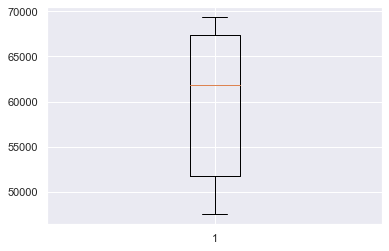

In [79]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

plt.boxplot(Top10_Cities_US['Median household income ($)'])

Vemos que ya no aparece el outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf073f72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf073f79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf07406eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf073eb130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf073eb4c0>],
 'means': []}

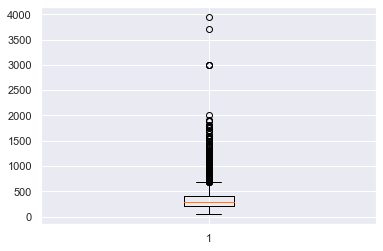

In [80]:
%matplotlib inline  

plt.boxplot(Top10_Cities_US['Precio $'])

<AxesSubplot:>

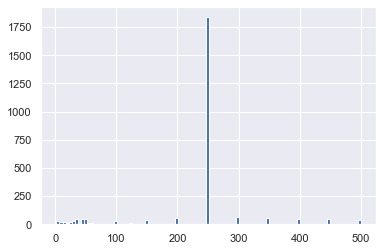

In [81]:
Top10_Cities_US['Distancia_metro_en_metros'].hist(bins=100)

A continuación realizo un análisis similar para el resto de variables que considero más importantes. 

Al ser un dataset muy diverso, con diferentes ciudades y tipos de hoteles, no considero que haya otros outliers, sino que la gama de habitaciones se concentra más en las habitaciones estándar. 

Habiendo menos hoteles muy caros o muy baratos. No los considero outliers porque son registros necesarios para poder predecir el precio de hoteles de esta gama (por ejemplo, en los modelos de fraude, lo más normal es que no haya fraude pero necesitamos la información de la gente que comete fraude para poder realizar un análisis y estudiar las características de estos cliente para aportar valor a la predicción, ya que puede haber patrones)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf0760c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf0760cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf0760c220>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf075ff340>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf075ff6d0>],
 'means': []}

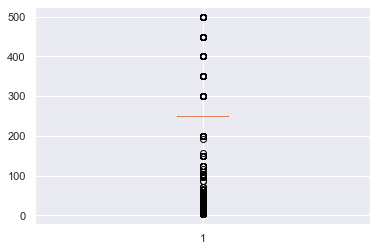

In [82]:
plt.boxplot(Top10_Cities_US.Distancia_metro_en_metros)

<AxesSubplot:>

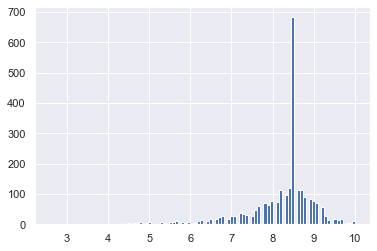

In [83]:
Top10_Cities_US['Rating_comentario'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf070f31f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf070f3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf070fcf10>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf07052070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf07052400>],
 'means': []}

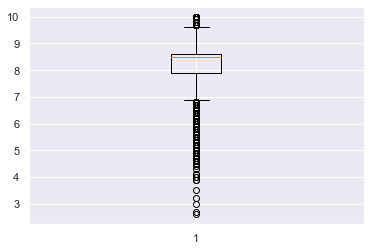

In [84]:
plt.boxplot(Top10_Cities_US.Rating_comentario)

<AxesSubplot:>

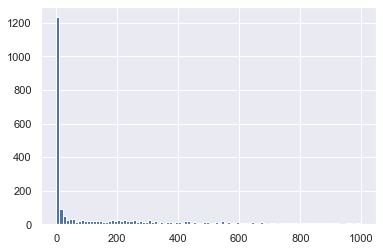

In [85]:
Top10_Cities_US['Número_de_comentario'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf06d47ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf06d3b220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf06d47820>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf06d3b940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf06d3bcd0>],
 'means': []}

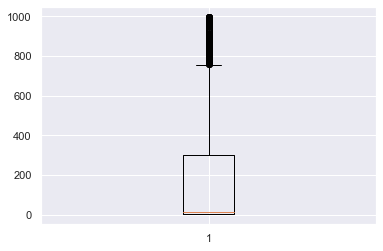

In [86]:
plt.boxplot(Top10_Cities_US.Número_de_comentario)

<AxesSubplot:>

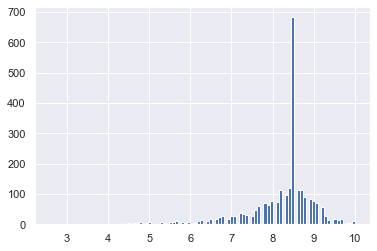

In [87]:
Top10_Cities_US['Rating_ubicación'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf06f2ea00>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf06f3c160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf06f2e790>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf06f3c880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf06f3cc10>],
 'means': []}

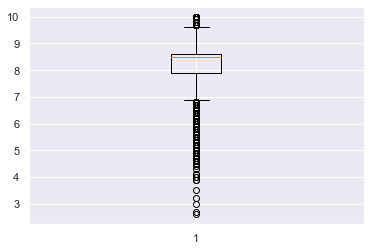

In [88]:
plt.boxplot(Top10_Cities_US.Rating_ubicación)


<AxesSubplot:>

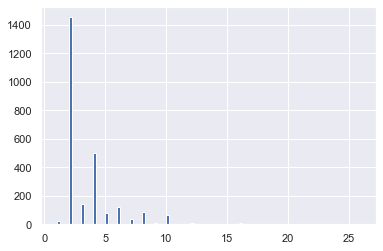

In [89]:
Top10_Cities_US['Max_personas'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf07844880>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf07844fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf07844610>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf07851730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf07851ac0>],
 'means': []}

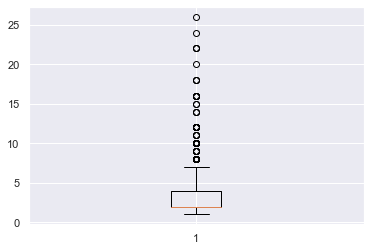

In [90]:
plt.boxplot(Top10_Cities_US.Max_personas)

<AxesSubplot:>

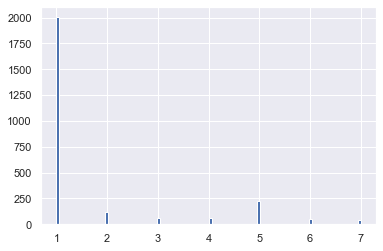

In [91]:
Top10_Cities_US['Habitaciones_disponibles'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf079db820>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf079dbf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf079db5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf079e76a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf079e7a30>],
 'means': []}

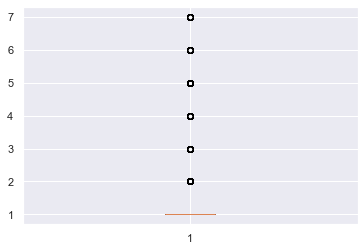

In [92]:
plt.boxplot(Top10_Cities_US.Habitaciones_disponibles)

<AxesSubplot:>

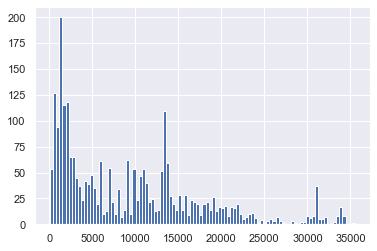

In [93]:
Top10_Cities_US['Distancia_alcentro_enmetros'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf08f6d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf08f6d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf08f6d0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf08f77130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf08f774c0>],
 'means': []}

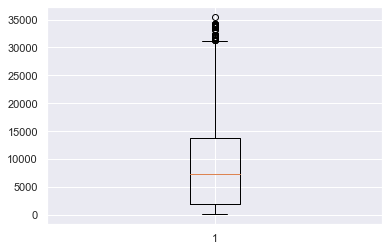

In [94]:
plt.boxplot(Top10_Cities_US.Distancia_alcentro_enmetros)

<AxesSubplot:>

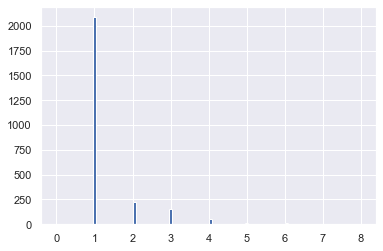

In [95]:
Top10_Cities_US['Numero_dormitorios'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf090ef970>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf090f90d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf090ef6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf090f97f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf090f9b80>],
 'means': []}

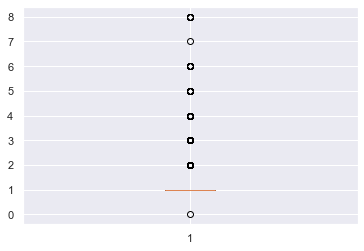

In [96]:
plt.boxplot(Top10_Cities_US.Numero_dormitorios)

<AxesSubplot:>

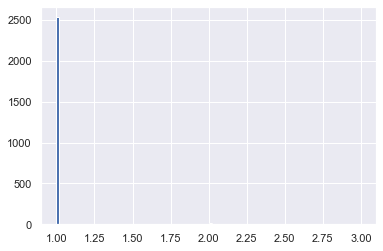

In [97]:
Top10_Cities_US['Numero_SaladeEstar'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf0928d3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf0928daf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf0928d160>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf09297250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf092975e0>],
 'means': []}

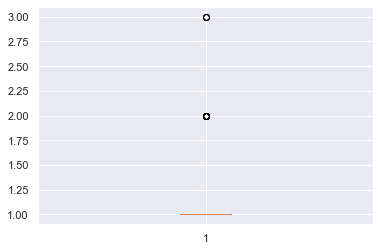

In [98]:
plt.boxplot(Top10_Cities_US.Numero_SaladeEstar)

<AxesSubplot:>

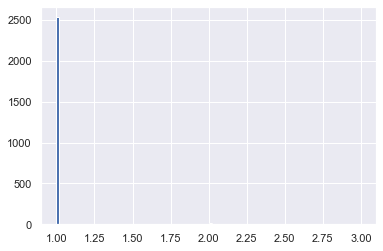

In [99]:
Top10_Cities_US['Numero_SaladeEstar'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cf0941be50>,
 'caps': [<matplotlib.lines.Line2D at 0x2cf094295b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cf0941bbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cf09429d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cf094360d0>],
 'means': []}

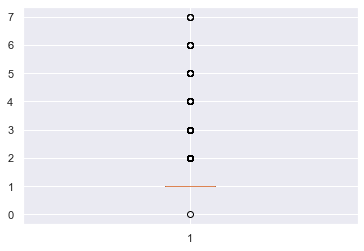

In [100]:
plt.boxplot(Top10_Cities_US.Numero_baños)

Vemos de nuevo el tipo de variables que tenemos ahora 

In [101]:
Top10_Cities_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2549 entries, 0 to 2686
Data columns (total 49 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Título                                            2549 non-null   object 
 1   Zona                                              2549 non-null   object 
 2   Distancia_metro_en_metros                         2549 non-null   float64
 3   Rating_comentario                                 2549 non-null   float64
 4   Número_de_comentario                              2549 non-null   float64
 5   Rating_ubicación                                  2549 non-null   float64
 6   Max_personas                                      2549 non-null   int64  
 7   Habitaciones_disponibles                          2549 non-null   float64
 8   City                                              2549 non-null   object 
 9   Precio $           

Elimino las variables que sé que no son útiles: El título no es útil y la zona tampoco pues tenemos mucha variedad y el 
dataset no tendría muestras suficientes para aprender patrones de zonas específicas ya que solo habría unas pocas líneas
para cada zona. (criterio experto)

In [102]:
Top10_Cities_US=Top10_Cities_US.drop(['Título','Zona'], axis=1)
Top10_Cities_US

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Rating_ubicación,Max_personas,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,...,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,Time Index (in minutes),Time Exp. Index,Inefficiency index,C02 Emission Index
0,51.0,8.3,655.0,8.3,2,1.0,NYC,383.0,1600.0,1.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
1,57.0,8.4,1.0,8.4,2,2.0,NYC,598.0,300.0,1.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
2,250.0,8.9,553.0,8.9,2,1.0,NYC,438.0,7000.0,1.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
3,42.0,8.6,4.0,8.6,2,5.0,NYC,287.0,1000.0,1.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
4,5.0,8.5,1.0,8.5,2,1.0,NYC,258.0,1300.0,1.0,...,50.91,61,53.44,56.87,69407,163.91,43.13,2677.94,190.40,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,250.0,8.5,1.0,8.5,6,1.0,Filadelfia,272.0,18100.0,2.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2683,250.0,8.5,1.0,8.5,4,1.0,Filadelfia,238.0,2200.0,2.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2684,250.0,8.5,1.0,8.5,2,1.0,Filadelfia,268.0,1400.0,1.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45
2685,46.0,8.5,1.0,8.5,2,3.0,Filadelfia,177.0,4500.0,1.0,...,45.80,52,45.96,53.56,47474,179.41,39.20,1394.13,269.32,7475.45


Exporto el dataset para guardar una copia

In [103]:
Top10_Cities_US.to_excel('Top10_Cities_US_testkdd2.xlsx', index = False)

Eliminamos las variables con una correlación lineal superior al 90%. La información de la correlación la hemos sacado anteriormente

In [104]:
Top10_Cities_US=Top10_Cities_US.drop(['Rating_ubicación','Habitacion_Estandar', 'Cost of Living Index',
                                     'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Safety Index', 
                                      'Rank crime index', 'Health Care Exp. Index', 'Time Index (in minutes)',
                                     'Time Exp. Index', 'Inefficiency index'], axis=1)
Top10_Cities_US

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,...,Public transportation score,Best place for staycation score,Mejor ciudad solteros,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,C02 Emission Index
0,51.0,8.3,655.0,2,1.0,NYC,383.0,1600.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407,163.91,3050.43
1,57.0,8.4,1.0,2,2.0,NYC,598.0,300.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407,163.91,3050.43
2,250.0,8.9,553.0,2,1.0,NYC,438.0,7000.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407,163.91,3050.43
3,42.0,8.6,4.0,2,5.0,NYC,287.0,1000.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407,163.91,3050.43
4,5.0,8.5,1.0,2,1.0,NYC,258.0,1300.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407,163.91,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,250.0,8.5,1.0,6,1.0,Filadelfia,272.0,18100.0,2.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474,179.41,7475.45
2683,250.0,8.5,1.0,4,1.0,Filadelfia,238.0,2200.0,2.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474,179.41,7475.45
2684,250.0,8.5,1.0,2,1.0,Filadelfia,268.0,1400.0,1.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474,179.41,7475.45
2685,46.0,8.5,1.0,2,3.0,Filadelfia,177.0,4500.0,1.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474,179.41,7475.45


Hago un análisis de correlación

In [105]:
fs = FeatureSelector(data = Top10_Cities_US, labels = Top10_Cities_US['Precio $'])

Ahora no tenemos ninguna variable que esté correlacionada linealmente más de un 90% ya que las hemos eliminado en el paso anterior

In [106]:
fs.identify_collinear(correlation_threshold=0.9)

6 features with a correlation magnitude greater than 0.90.



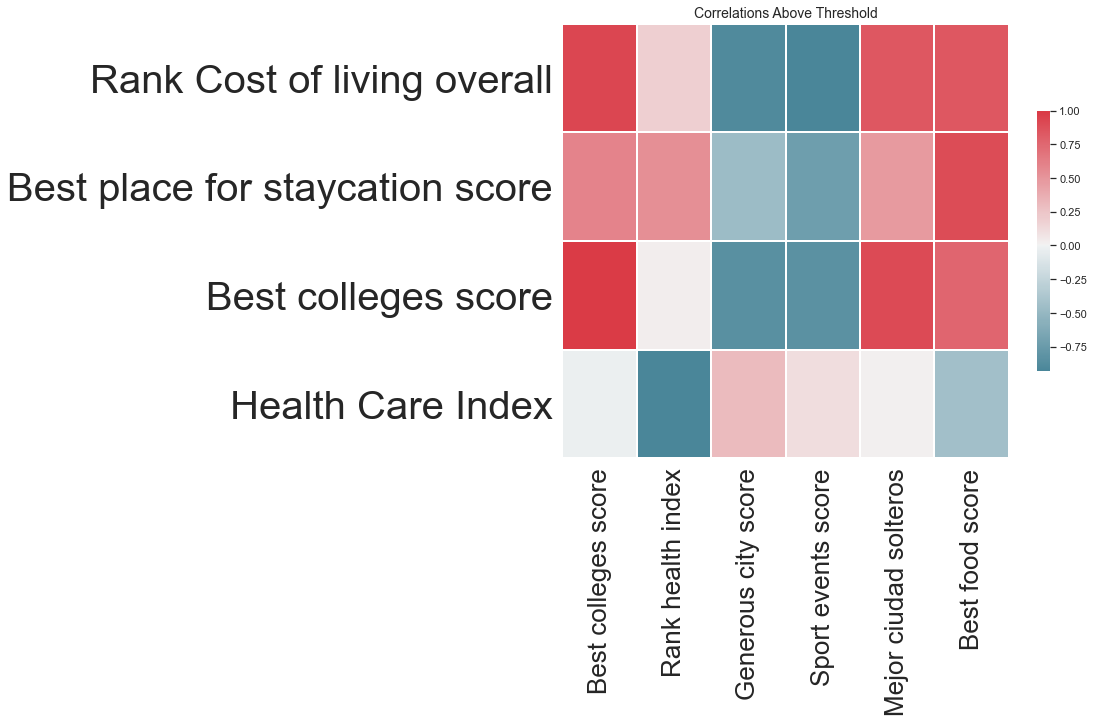

In [107]:
fs.plot_collinear() 

Vemos de nuevo el tipo de las variables, después de la eliminación de las que tenían una correlación lineal muy grande

In [108]:
Top10_Cities_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2549 entries, 0 to 2686
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Distancia_metro_en_metros                         2549 non-null   float64
 1   Rating_comentario                                 2549 non-null   float64
 2   Número_de_comentario                              2549 non-null   float64
 3   Max_personas                                      2549 non-null   int64  
 4   Habitaciones_disponibles                          2549 non-null   float64
 5   City                                              2549 non-null   object 
 6   Precio $                                          2549 non-null   float64
 7   Distancia_alcentro_enmetros                       2549 non-null   float64
 8   Numero_dormitorios                                2549 non-null   float64
 9   Numero_SaladeEstar 

La variable de median household income debe estar como float ya que al ser dinero, puede tener decimales, por ello, cambio el tipo

In [109]:
Top10_Cities_US['Median household income ($)']=Top10_Cities_US['Median household income ($)'].astype(float)
Top10_Cities_US

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,City,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,...,Public transportation score,Best place for staycation score,Mejor ciudad solteros,Felicidad score,"Rank: Weather four seasons % (1 best, 100 worst)",Score best cities raise a family,Best food score,Median household income ($),Traffic Index,C02 Emission Index
0,51.0,8.3,655.0,2,1.0,NYC,383.0,1600.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407.0,163.91,3050.43
1,57.0,8.4,1.0,2,2.0,NYC,598.0,300.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407.0,163.91,3050.43
2,250.0,8.9,553.0,2,1.0,NYC,438.0,7000.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407.0,163.91,3050.43
3,42.0,8.6,4.0,2,5.0,NYC,287.0,1000.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407.0,163.91,3050.43
4,5.0,8.5,1.0,2,1.0,NYC,258.0,1300.0,1.0,1.0,...,68.87,53.52,44.91,50.91,61,53.44,56.87,69407.0,163.91,3050.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,250.0,8.5,1.0,6,1.0,Filadelfia,272.0,18100.0,2.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474.0,179.41,7475.45
2683,250.0,8.5,1.0,4,1.0,Filadelfia,238.0,2200.0,2.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474.0,179.41,7475.45
2684,250.0,8.5,1.0,2,1.0,Filadelfia,268.0,1400.0,1.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474.0,179.41,7475.45
2685,46.0,8.5,1.0,2,3.0,Filadelfia,177.0,4500.0,1.0,1.0,...,48.73,48.33,48.97,45.80,52,45.96,53.56,47474.0,179.41,7475.45


Vemos que el tipo ya ha cambiado

In [110]:
Top10_Cities_US.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2549 entries, 0 to 2686
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Distancia_metro_en_metros                         2549 non-null   float64
 1   Rating_comentario                                 2549 non-null   float64
 2   Número_de_comentario                              2549 non-null   float64
 3   Max_personas                                      2549 non-null   int64  
 4   Habitaciones_disponibles                          2549 non-null   float64
 5   City                                              2549 non-null   object 
 6   Precio $                                          2549 non-null   float64
 7   Distancia_alcentro_enmetros                       2549 non-null   float64
 8   Numero_dormitorios                                2549 non-null   float64
 9   Numero_SaladeEstar 

Creamos las variables dummies para las variables que son categóricas (1/0), 1 si pertenece a esa ciudad y 0 si no pertenece a esa ciudad. Esto lo hacemos para posteriormente poder analizar si esas variables son importantes en nuestro modelo para obtener un precio (las ciudades más populares, como NY, tendrán un precio más elevado, en general)

In [111]:
Top10_Cities_US = pd.get_dummies(Top10_Cities_US)
Top10_Cities_US

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,...,Median household income ($),Traffic Index,C02 Emission Index,City_Atlanta,City_Chicago,City_Filadelfia,City_Las Vegas,City_Los Angeles,City_NYC,City_Orlando
0,51.0,8.3,655.0,2,1.0,383.0,1600.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
1,57.0,8.4,1.0,2,2.0,598.0,300.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
2,250.0,8.9,553.0,2,1.0,438.0,7000.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
3,42.0,8.6,4.0,2,5.0,287.0,1000.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
4,5.0,8.5,1.0,2,1.0,258.0,1300.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,250.0,8.5,1.0,6,1.0,272.0,18100.0,2.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2683,250.0,8.5,1.0,4,1.0,238.0,2200.0,2.0,1.0,2.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2684,250.0,8.5,1.0,2,1.0,268.0,1400.0,1.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2685,46.0,8.5,1.0,2,3.0,177.0,4500.0,1.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0


Vemos el número de filas y columnas que nos quedan (2549 filas y 29 columnas)

In [112]:
Top10_Cities_US.shape

(2549, 41)

In [113]:
Top10_Cities_US

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Precio $,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,...,Median household income ($),Traffic Index,C02 Emission Index,City_Atlanta,City_Chicago,City_Filadelfia,City_Las Vegas,City_Los Angeles,City_NYC,City_Orlando
0,51.0,8.3,655.0,2,1.0,383.0,1600.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
1,57.0,8.4,1.0,2,2.0,598.0,300.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
2,250.0,8.9,553.0,2,1.0,438.0,7000.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
3,42.0,8.6,4.0,2,5.0,287.0,1000.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
4,5.0,8.5,1.0,2,1.0,258.0,1300.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,250.0,8.5,1.0,6,1.0,272.0,18100.0,2.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2683,250.0,8.5,1.0,4,1.0,238.0,2200.0,2.0,1.0,2.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2684,250.0,8.5,1.0,2,1.0,268.0,1400.0,1.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0
2685,46.0,8.5,1.0,2,3.0,177.0,4500.0,1.0,1.0,1.0,...,47474.0,179.41,7475.45,0,0,1,0,0,0,0


In [114]:
Top10_Cities_US.to_excel('Top10_Cities_US_testkdd3.xlsx', index = False)

Confirmamos que no tenemos missings, viendo el porcentaje de missings

In [115]:
Top10_Cities_US.isnull().mean()*100

Distancia_metro_en_metros                           0.0
Rating_comentario                                   0.0
Número_de_comentario                                0.0
Max_personas                                        0.0
Habitaciones_disponibles                            0.0
Precio $                                            0.0
Distancia_alcentro_enmetros                         0.0
Numero_dormitorios                                  0.0
Numero_SaladeEstar                                  0.0
Numero_baños                                        0.0
Estudio                                             0.0
Habitacion_Superior                                 0.0
Apartamento                                         0.0
Rank Cost of living overall                         0.0
Restaurant Price Index                              0.0
Local Purchasing Power Index                        0.0
Crime Index                                         0.0
Health Care Index                               

A continuación voy a analizar la importancia de las variables que puede ser usadas para predecir la target. Por ello, omito la target en este análisis

In [116]:
fs = FeatureSelector(data = Top10_Cities_US.drop(['Precio $'], axis=1), labels = Top10_Cities_US['Precio $'])

Utilizamos un modelo de regresión para analizar la importancia de nuestras variables con la métrica de evaluación l2 (Ridge regression). 

Los modelos de Ridge y Lasso son usados para prevenir overfitting al realizar los modelos de ML (en el paso de predicción en el que vayamos a valorar diferentes modelos, usando un pipeline, por ejemplo. Este paso no se realiza en esta práctica por no estar requerido en las instrucciones).

Según este método, tenemos 9 variables con 0 importancia

In [117]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[511]	valid_0's l2: 47298.3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[318]	valid_0's l2: 47551.1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's l2: 31822.4
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[136]	valid_0's l2: 49917.2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[76]	valid_0's l2: 23891.5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[428]	valid_0's l2: 36097.2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[360]	valid_0's l2: 47954.4
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration 

In [118]:
fs.data_all.head(10)

,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_SaladeEstar,Numero_baños,Estudio,...,Median household income ($),Traffic Index,C02 Emission Index,City_Atlanta,City_Chicago,City_Filadelfia,City_Las Vegas,City_Los Angeles,City_NYC,City_Orlando
0,51.0,8.3,655.0,2,1.0,1600.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
1,57.0,8.4,1.0,2,2.0,300.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
2,250.0,8.9,553.0,2,1.0,7000.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
3,42.0,8.6,4.0,2,5.0,1000.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
4,5.0,8.5,1.0,2,1.0,1300.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
5,42.0,8.0,1.0,2,3.0,1600.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
6,42.0,7.2,5.0,2,1.0,1600.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
7,42.0,8.6,592.0,2,5.0,1600.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
8,34.0,8.6,262.0,2,5.0,1900.0,1.0,1.0,1.0,1.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0
9,50.0,7.7,1.0,2,6.0,700.0,1.0,1.0,1.0,0.0,...,69407.0,163.91,3050.43,0,0,0,0,0,1,0


Mostramos las 10 variables con 0 importancia. Vemos que la ciudad a la que pertenece el hotel no tiene, en general mucha relevancia.

In [119]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[0:15]

['City_Los Angeles',
 'City_Las Vegas',
 'City_Atlanta',
 'City_Filadelfia',
 'City_NYC',
 'City_Chicago',
 'Rank: Weather four seasons % (1 best, 100 worst)',
 'Numero_SaladeEstar',
 'Mejor ciudad solteros',
 'Sport events score',
 'Best colleges score',
 'Rank health index',
 'City_Orlando']

Analizamos la importancia de las variables. Vemos que la variable más importante es la distancia al centro, seguida del número de comentarios y el rating de los comentarios

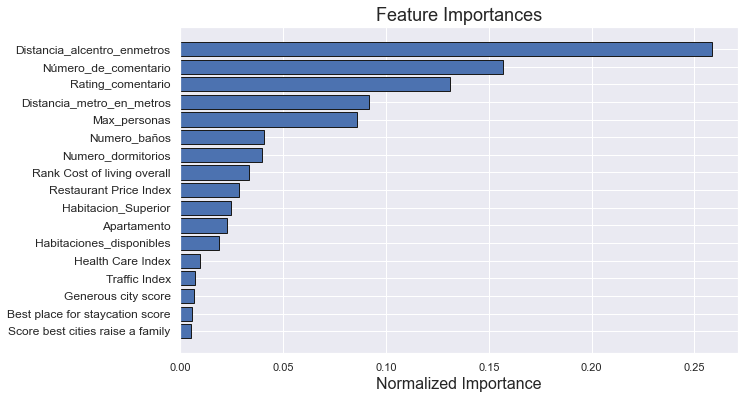

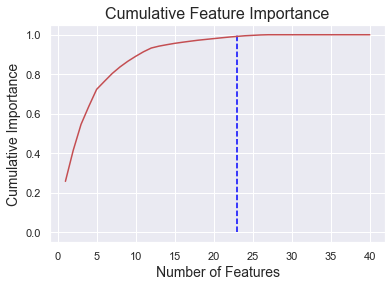

23 features required for 0.99 of cumulative importance


In [120]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 17)

Vemos que el número óptimo de features para usar en nuestra predicción es de 23

A continuación podemos ver la importancia de cada una de las variables

In [121]:
fs.feature_importances.head(23)

,feature,importance,normalized_importance,cumulative_importance
0,Distancia_alcentro_enmetros,1992.5,0.258330,0.258330
1,Número_de_comentario,1209.8,0.156852,0.415182
2,Rating_comentario,1012.4,0.131259,0.546441
3,Distancia_metro_en_metros,706.5,0.091599,0.638040
4,Max_personas,661.1,0.085712,0.723752
5,Numero_baños,313.1,0.040594,0.764346
6,Numero_dormitorios,306.9,0.039790,0.804136
7,Rank Cost of living overall,256.5,0.033256,0.837391
8,Restaurant Price Index,220.3,0.028562,0.865954
9,Habitacion_Superior,191.8,0.024867,0.890821


Analizo las variables que tienen poca importancia (no importancia cero)

In [122]:
fs.identify_low_importance(cumulative_importance = 0.99)

22 features required for cumulative importance of 0.99 after one hot encoding.
18 features do not contribute to cumulative importance of 0.99.



A continuación muestro las variables con baja importancia, vemos que muchas son las que nos aparecían con 0 importancia ya que aún no las hemos eliminado 

In [123]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:20]

['Remote workers score',
 'Estudio',
 'Public transportation score',
 'C02 Emission Index',
 'Best colleges score',
 'Sport events score',
 'Mejor ciudad solteros',
 'Numero_SaladeEstar',
 'Rank: Weather four seasons % (1 best, 100 worst)',
 'City_Chicago',
 'City_Atlanta',
 'City_Filadelfia',
 'Rank health index',
 'City_Las Vegas',
 'City_Los Angeles',
 'Best food score',
 'City_NYC',
 'City_Orlando']

A continuación voy a proceder a la limpieza de las variables que tienen 0 importancia o poca importancia, para ello, creo un diccionario con los diferentes métodos (parecido como un pipeline)

In [124]:
fs = FeatureSelector(data = Top10_Cities_US.drop(['Precio $'], axis=1), labels = Top10_Cities_US['Precio $'])

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'regression', 'eval_metric': 'l2', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[152]	valid_0's l2: 65107.9
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[68]	valid_0's l2: 38821.2
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[217]	valid_0's l2: 35534.4
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's l2: 47855.8
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[141]	valid_0's l2: 49883.1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[107]	valid_0's l2: 44849.1
Training until validation scores don't improve for 100 rounds
Earl

A continuación las elimino usando .remove y usando los métodos anteriores de importancia

In [125]:
Top10_Cities_US_removedall_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 18 features.


In [126]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,Distancia_alcentro_enmetros,1065.9,0.250211,0.250211
1,Número_de_comentario,622.7,0.146174,0.396385
2,Rating_comentario,578.1,0.135704,0.532089
3,Distancia_metro_en_metros,382.4,0.089765,0.621854
4,Max_personas,377.6,0.088638,0.710493


Vemos el número de filas y columnas que nos queda en el dataset. Tenemos 2549 filas y 23  columnas

In [127]:
Top10_Cities_US_removedall_once.shape

(2549, 22)

Vemos las columnas que han quedado

In [128]:
Top10_Cities_US_removedall_once.columns

Index(['Distancia_metro_en_metros', 'Rating_comentario',
       'Número_de_comentario', 'Max_personas', 'Habitaciones_disponibles',
       'Distancia_alcentro_enmetros', 'Numero_dormitorios', 'Numero_baños',
       'Habitacion_Superior', 'Apartamento', 'Rank Cost of living overall',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Crime Index',
       'Health Care Index', 'Country music score', 'Remote workers score',
       'Generous city score', 'Best place for staycation score',
       'Score best cities raise a family', 'Median household income ($)',
       'Traffic Index'],
      dtype='object')

Añadimos el precio, ya que antes lo habíamos quitado para hacer el análisis de correlaciones y solo nos quedamos con las variables del paso anterior (junto con el precio)

In [129]:
Top10_Cities_US=Top10_Cities_US[['Precio $','Distancia_metro_en_metros', 'Rating_comentario',
       'Número_de_comentario', 'Max_personas', 'Habitaciones_disponibles',
       'Distancia_alcentro_enmetros', 'Numero_dormitorios', 'Numero_baños',
       'Habitacion_Superior', 'Apartamento', 'Rank Cost of living overall',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Crime Index',
       'Health Care Index', 'Remote workers score', 'Generous city score',
       'Best place for staycation score', 'Felicidad score',
       'Score best cities raise a family', 'Median household income ($)',
       'Traffic Index']]

A continuación tenemos el dataset final ya limpio

In [130]:
Top10_Cities_US

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Local Purchasing Power Index,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index
0,383.0,51.0,8.3,655.0,2,1.0,1600.0,1.0,1.0,1.0,...,100.00,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91
1,598.0,57.0,8.4,1.0,2,2.0,300.0,1.0,1.0,1.0,...,100.00,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91
2,438.0,250.0,8.9,553.0,2,1.0,7000.0,1.0,1.0,1.0,...,100.00,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91
3,287.0,42.0,8.6,4.0,2,5.0,1000.0,1.0,1.0,1.0,...,100.00,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91
4,258.0,5.0,8.5,1.0,2,1.0,1300.0,1.0,1.0,0.0,...,100.00,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,272.0,250.0,8.5,1.0,6,1.0,18100.0,2.0,1.0,0.0,...,82.65,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41
2683,238.0,250.0,8.5,1.0,4,1.0,2200.0,2.0,2.0,0.0,...,82.65,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41
2684,268.0,250.0,8.5,1.0,2,1.0,1400.0,1.0,1.0,0.0,...,82.65,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41
2685,177.0,46.0,8.5,1.0,2,3.0,4500.0,1.0,1.0,0.0,...,82.65,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Precio $'),
  Text(1, 0, 'Distancia_metro_en_metros'),
  Text(2, 0, 'Rating_comentario'),
  Text(3, 0, 'Número_de_comentario'),
  Text(4, 0, 'Max_personas'),
  Text(5, 0, 'Habitaciones_disponibles'),
  Text(6, 0, 'Distancia_alcentro_enmetros'),
  Text(7, 0, 'Numero_dormitorios'),
  Text(8, 0, 'Numero_baños'),
  Text(9, 0, 'Habitacion_Superior'),
  Text(10, 0, 'Apartamento'),
  Text(11, 0, 'Rank Cost of living overall'),
  Text(12, 0, 'Restaurant Price Index'),
  Text(13, 0, 'Local Purchasing Power Index'),
  Text(14, 0, 'Crime Index'),
  Text(15, 0, 'Health Care Index'),
  Text(16, 0, 'Remote workers score'),
  Text(17, 0, 'Generous city score'),
  Text(18, 0, 'Best place for staycation score'),
  Text(19, 0, 'Felicidad score'),
  Text(20, 0, 'Score best cities raise a family'),
  Text(21, 0, 'Median household income ($)'),
  Text(22, 0, 'Traffic Index')])

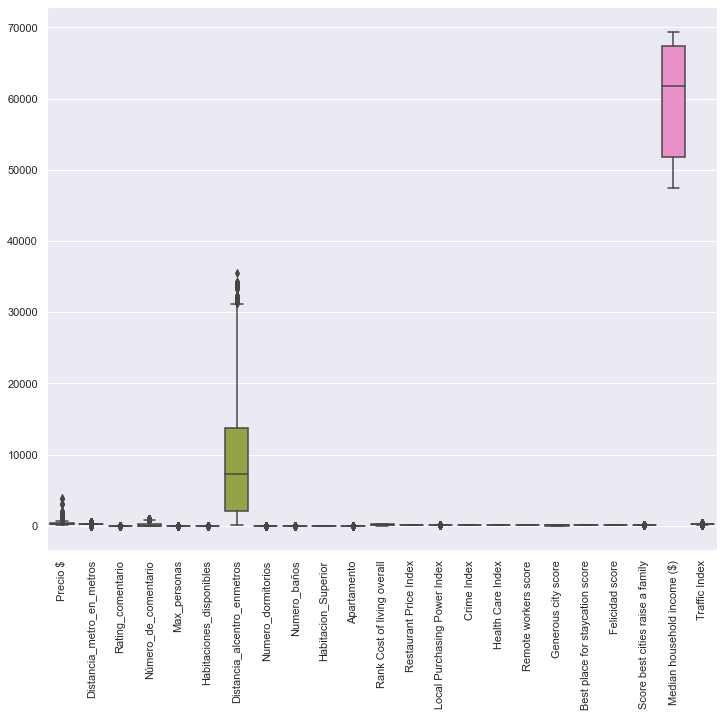

In [131]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=Top10_Cities_US)
plt.xticks(rotation=90)

A continuación exportamos el dataset final

Exporto el dataset final

In [132]:
Top10_Cities_US.to_excel('Top10_Cities_US_testkdd4.xlsx', index = False)

In [133]:
Top10_Cities_US.corr()

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Local Purchasing Power Index,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index
Precio $,1.000000,-0.090904,0.279381,-0.103565,0.357328,-0.057854,0.109217,0.380800,0.358872,0.003440,...,-0.057497,-0.115785,-0.025313,-0.107202,0.162259,0.004852,0.062829,0.006599,0.113094,0.061257
Distancia_metro_en_metros,-0.090904,1.000000,-0.012906,-0.054850,0.101401,-0.064433,0.210402,0.057742,0.057014,-0.032406,...,0.335167,0.320120,0.085977,0.306888,-0.400168,0.193360,0.265815,-0.001032,-0.158912,0.212150
Rating_comentario,0.279381,-0.012906,1.000000,-0.046614,0.148207,-0.048710,0.010361,0.103222,0.115327,0.045852,...,-0.008330,0.072510,0.066523,0.078824,0.011872,0.067087,-0.012747,-0.037304,-0.079296,-0.102690
Número_de_comentario,-0.103565,-0.054850,-0.046614,1.000000,-0.245486,0.160702,0.000381,-0.255006,-0.242092,0.196260,...,0.002923,-0.087902,-0.028306,-0.083414,0.111325,-0.064397,0.067189,0.017464,0.142434,0.090924
Max_personas,0.357328,0.101401,0.148207,-0.245486,1.000000,-0.154262,0.363047,0.720285,0.721378,-0.222840,...,0.020182,0.000463,0.016795,0.212404,-0.289639,0.319860,-0.062114,0.215023,-0.297429,-0.123061
Habitaciones_disponibles,-0.057854,-0.064433,-0.048710,0.160702,-0.154262,1.000000,0.004299,-0.170532,-0.160607,0.184152,...,-0.028722,-0.124550,-0.062706,-0.085682,0.052556,-0.022735,0.006230,0.069136,0.084033,0.055413
Distancia_alcentro_enmetros,0.109217,0.210402,0.010361,0.000381,0.363047,0.004299,1.000000,0.281228,0.326292,-0.014263,...,0.077828,-0.224565,-0.108280,0.123185,-0.393113,0.434459,0.116295,0.443349,-0.193899,0.201465
Numero_dormitorios,0.380800,0.057742,0.103222,-0.255006,0.720285,-0.170532,0.281228,1.000000,0.831203,-0.195566,...,0.026739,0.042581,0.061579,0.158384,-0.154300,0.170384,-0.013969,0.093247,-0.174567,-0.075229
Numero_baños,0.358872,0.057014,0.115327,-0.242092,0.721378,-0.160607,0.326292,0.831203,1.000000,-0.176671,...,0.010151,-0.011613,0.009072,0.148265,-0.213216,0.230030,-0.047148,0.164750,-0.213845,-0.081686
Habitacion_Superior,0.003440,-0.032406,0.045852,0.196260,-0.222840,0.184152,-0.014263,-0.195566,-0.176671,1.000000,...,0.014511,-0.064823,-0.111221,-0.070124,0.006777,0.013530,0.004218,0.046288,0.058717,0.029415


<AxesSubplot:>

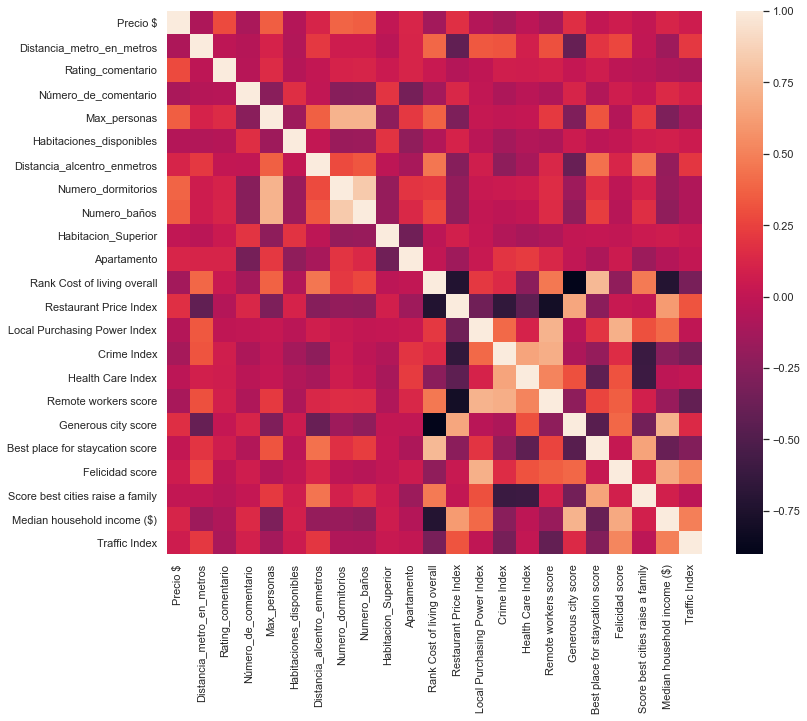

In [134]:
sns.heatmap(Top10_Cities_US.corr())

In [135]:
conditions = [
    (Top10_Cities_US['Precio $']/Top10_Cities_US['Numero_dormitorios'] <=200),
    (Top10_Cities_US['Precio $']/Top10_Cities_US['Numero_dormitorios'] >200) & (Top10_Cities_US['Precio $']/Top10_Cities_US['Numero_dormitorios'] <=600) ,
    (Top10_Cities_US['Precio $']/Top10_Cities_US['Numero_dormitorios'] >600)]
choices = [1, 2, 3]


Top10_Cities_US['Price_Category'] = np.select(conditions, choices, default=2)


<ipython-input-135-dcf93b7d8d0d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
Top10_Cities_US

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index,Price_Category
0,383.0,51.0,8.3,655.0,2,1.0,1600.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,2
1,598.0,57.0,8.4,1.0,2,2.0,300.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,2
2,438.0,250.0,8.9,553.0,2,1.0,7000.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,2
3,287.0,42.0,8.6,4.0,2,5.0,1000.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,2
4,258.0,5.0,8.5,1.0,2,1.0,1300.0,1.0,1.0,0.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,272.0,250.0,8.5,1.0,6,1.0,18100.0,2.0,1.0,0.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,1
2683,238.0,250.0,8.5,1.0,4,1.0,2200.0,2.0,2.0,0.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,1
2684,268.0,250.0,8.5,1.0,2,1.0,1400.0,1.0,1.0,0.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,2
2685,177.0,46.0,8.5,1.0,2,3.0,4500.0,1.0,1.0,0.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,1


<AxesSubplot:>

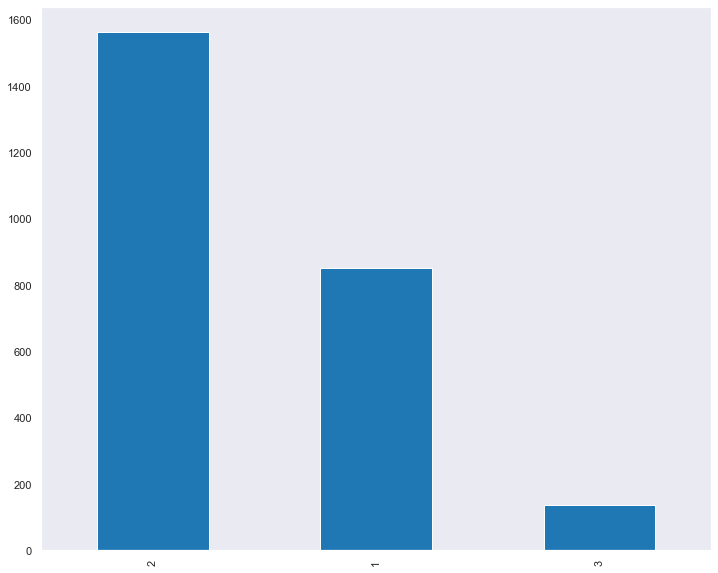

In [137]:
Top10_Cities_US['Price_Category'].value_counts().plot.bar()

In [138]:
Top10_Cities_US_3=Top10_Cities_US[Top10_Cities_US['Price_Category']==3]
Top10_Cities_US_Other=Top10_Cities_US[Top10_Cities_US['Price_Category']!=3]


In [139]:
Top10_Cities_US_3

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index,Price_Category
140,1690.0,53.0,8.9,510.0,3,1.0,900.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
145,754.0,57.0,7.4,572.0,2,1.0,500.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
151,1160.0,23.0,8.4,163.0,2,5.0,3000.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
152,1790.0,53.0,8.4,9.0,2,5.0,1000.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
181,1002.0,150.0,8.7,753.0,2,1.0,5100.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,1745.0,250.0,9.7,14.0,5,1.0,2600.0,1.0,2.0,0.0,...,56.19,55.81,49.25,20.03,57.13,47.04,53.42,53575.0,127.74,3
2506,831.0,19.0,9.2,194.0,3,1.0,800.0,1.0,1.0,1.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,3
2523,1216.0,19.0,9.5,42.0,2,1.0,600.0,1.0,1.0,1.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,3
2578,1798.0,250.0,8.5,1.0,2,1.0,3000.0,1.0,1.0,0.0,...,61.51,69.38,47.86,32.88,48.33,45.80,45.96,47474.0,179.41,3


<AxesSubplot:>

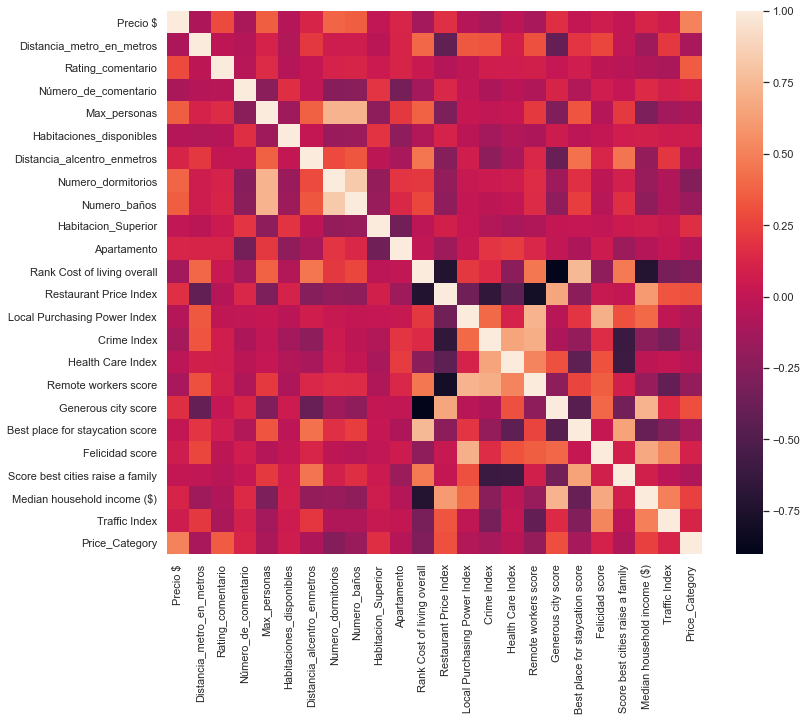

In [140]:
sns.heatmap(Top10_Cities_US.corr())

In [141]:
df_3_upsampled = resample(Top10_Cities_US_3,random_state=42,n_samples=900,replace=True)

In [142]:
Top10_Cities_US = pd.concat([df_3_upsampled,Top10_Cities_US_Other])

In [143]:
df_3_upsampled

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index,Price_Category
2086,1300.0,250.0,8.6,146.0,2,2.0,24500.0,1.0,1.0,1.0,...,48.41,61.33,44.68,34.97,53.56,53.99,52.73,67418.0,340.93,3
2051,889.0,250.0,9.2,183.0,4,1.0,12300.0,1.0,2.0,1.0,...,48.41,61.33,44.68,34.97,53.56,53.99,52.73,67418.0,340.93,3
216,780.0,14.0,8.4,158.0,2,5.0,3500.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
2105,1270.0,250.0,9.1,239.0,2,1.0,14200.0,1.0,1.0,1.0,...,48.41,61.33,44.68,34.97,53.56,53.99,52.73,67418.0,340.93,3
1317,798.0,250.0,8.8,230.0,3,5.0,15100.0,1.0,1.0,1.0,...,51.93,62.50,53.82,24.81,60.87,50.93,55.35,51757.0,179.49,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,644.0,250.0,8.8,786.0,4,4.0,24700.0,1.0,1.0,0.0,...,51.93,62.50,53.82,24.81,60.87,50.93,55.35,51757.0,179.49,3
140,1690.0,53.0,8.9,510.0,3,1.0,900.0,1.0,1.0,1.0,...,46.96,61.64,46.79,49.61,53.52,50.91,53.44,69407.0,163.91,3
2221,693.0,250.0,8.5,1.0,2,1.0,11600.0,1.0,1.0,0.0,...,48.41,61.33,44.68,34.97,53.56,53.99,52.73,67418.0,340.93,3
624,1800.0,500.0,8.5,1.0,4,1.0,7000.0,1.0,1.0,0.0,...,64.81,66.41,55.06,42.48,57.03,55.65,49.02,61811.0,191.20,3


<AxesSubplot:>

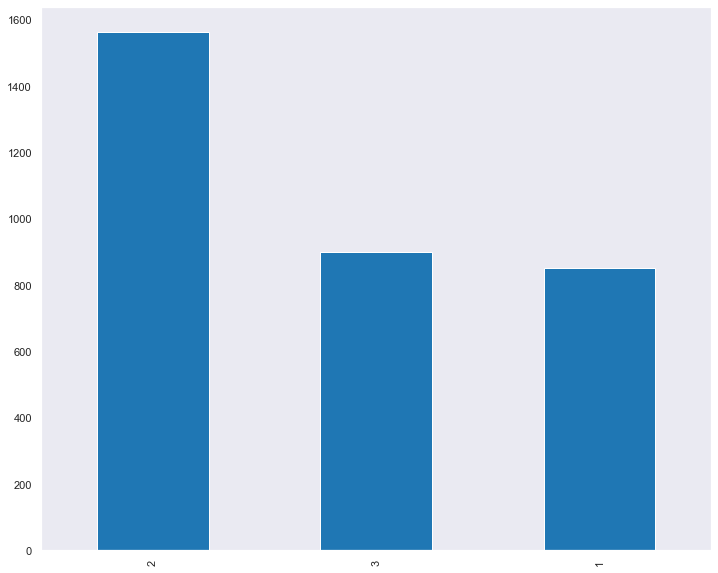

In [144]:
Top10_Cities_US['Price_Category'].value_counts().plot.bar()

In [145]:
Top10_Cities_US.corr()

,Precio $,Distancia_metro_en_metros,Rating_comentario,Número_de_comentario,Max_personas,Habitaciones_disponibles,Distancia_alcentro_enmetros,Numero_dormitorios,Numero_baños,Habitacion_Superior,...,Crime Index,Health Care Index,Remote workers score,Generous city score,Best place for staycation score,Felicidad score,Score best cities raise a family,Median household income ($),Traffic Index,Price_Category
Precio $,1.000000,-0.180127,0.321969,-0.106403,0.187780,-0.046492,-0.011429,0.145051,0.194023,0.109901,...,-0.199899,-0.111502,-0.225694,0.274827,-0.074685,0.031347,0.004203,0.227080,0.046484,0.654964
Distancia_metro_en_metros,-0.180127,1.000000,-0.042817,-0.081381,0.102862,-0.068875,0.258468,0.069314,0.059832,-0.071867,...,0.393199,0.127687,0.331269,-0.447557,0.230610,0.305109,-0.075637,-0.222861,0.242683,-0.160665
Rating_comentario,0.321969,-0.042817,1.000000,-0.032933,0.085940,-0.025372,-0.014311,0.049128,0.074864,0.112618,...,0.015878,0.040436,0.002411,0.088662,0.016759,0.003422,-0.050650,0.002563,-0.055450,0.428614
Número_de_comentario,-0.106403,-0.081381,-0.032933,1.000000,-0.241309,0.142099,0.003188,-0.240503,-0.238772,0.193468,...,-0.125151,-0.038643,-0.103013,0.130274,-0.077033,0.060421,0.043432,0.163287,0.083225,0.075796
Max_personas,0.187780,0.102862,0.085940,-0.241309,1.000000,-0.147873,0.361528,0.596062,0.605748,-0.231664,...,0.029232,0.014939,0.222674,-0.289734,0.343766,-0.071635,0.206512,-0.313057,-0.130617,-0.095845
Habitaciones_disponibles,-0.046492,-0.068875,-0.025372,0.142099,-0.147873,1.000000,0.013575,-0.156290,-0.155877,0.185617,...,-0.135444,-0.063073,-0.088795,0.055936,-0.030820,0.014551,0.085445,0.097685,0.063797,0.046065
Distancia_alcentro_enmetros,-0.011429,0.258468,-0.014311,0.003188,0.361528,0.013575,1.000000,0.227050,0.257028,-0.038618,...,-0.213661,-0.116733,0.057602,-0.420258,0.386289,0.156921,0.411725,-0.168730,0.327979,-0.059366
Numero_dormitorios,0.145051,0.069314,0.049128,-0.240503,0.596062,-0.156290,0.227050,1.000000,0.826536,-0.197186,...,0.074367,0.066699,0.174970,-0.171639,0.174908,-0.022407,0.080746,-0.191394,-0.080408,-0.279104
Numero_baños,0.194023,0.059832,0.074864,-0.238772,0.605748,-0.155877,0.257028,0.826536,1.000000,-0.183239,...,0.023250,0.007330,0.154814,-0.210998,0.227887,-0.053052,0.143978,-0.216082,-0.086352,-0.181028
Habitacion_Superior,0.109901,-0.071867,0.112618,0.193468,-0.231664,0.185617,-0.038618,-0.197186,-0.183239,1.000000,...,-0.097947,-0.091859,-0.112457,0.087204,-0.039860,0.046955,0.028437,0.133371,0.076046,0.248240


In [146]:
Top10_Cities_US=Top10_Cities_US.reset_index()

In [147]:
Top10_Cities_US.to_excel('Top10_Cities_US_testkdd5.xlsx', index = False)

In [148]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
                                        Top10_Cities_US.drop(columns = ["Precio $","Price_Category"] ),
                                        Top10_Cities_US["Price_Category"] ,
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [149]:
train_y

1732    1
1414    2
474     3
2860    2
2203    1
       ..
2154    1
3089    1
1766    1
1122    2
1346    1
Name: Price_Category, Length: 2484, dtype: int32

In [150]:
train_X.reset_index(drop = True, inplace = True)
test_X.reset_index(drop = True, inplace = True)
train_y.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)

In [151]:
from sklearn.tree import DecisionTreeClassifier   # Árbol de decisión 
arbol = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier   # Random forest
random_forest = RandomForestClassifier()


from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
gradient_boosting = GradientBoostingClassifier()


from sklearn.preprocessing import StandardScaler     # importamos StandardScaler para realizar la estandarización cuando sea necesaria
from sklearn.feature_selection import RFECV, SelectKBest, f_classif  # importanmos RFECV y SeleckBest que los usaré para la selección de variables 
from sklearn.linear_model import LogisticRegression

logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),   #Aquí usamos regresión logística usando la selección RFECV
                               ("logreg",LogisticRegression())
                              ]
                       )

logreg_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                               ("kbest",SelectKBest()), # Aquí usamos la regresión logística con SelectKBest para selección de variables
                               ("logreg",LogisticRegression())
                              ]
                       )

from sklearn.neighbors import KNeighborsClassifier
neighbors = Pipeline(steps=[("scaler",StandardScaler()),  # KNeighbors sin realizar selección de variables.
                            ("knn",KNeighborsClassifier())
                          ]
                   )


neighbors_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                                  ("kbest",SelectKBest()),  # KNeighbors con selección de variables mediante el método SelectKBest
                                  ("knn",KNeighborsClassifier())
                                ]
                         )


from sklearn.svm import SVC
svm = Pipeline(steps=[("scaler",StandardScaler()), # Support Vector Machine, kernel es brf por defecto
                      ("svm",SVC())
                     ]
              )

svm_kbest = Pipeline(steps=[("scaler",StandardScaler()),
                            ("kbest",SelectKBest()),    # Support Vector Machine, con método de selección kbest
                            ("svm",SVC())])



# Naïve Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_kbest = Pipeline(steps=[("kbest",SelectKBest()),
                           ("nb",GaussianNB())])


# Perceptrón multicapa sin elegir ningún tipo de selección:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(steps=[("scaler",StandardScaler()),
                      ("mlp",MLPClassifier())
                     ]
              )


from sklearn.ensemble import BaggingClassifier
## Baggin tomando como estimador un árbol de decisión

dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1)


## Adaboost de regresiones logísticas
from sklearn.ensemble import AdaBoostClassifier
lr = LogisticRegression(penalty="l2",
                        solver="lbfgs")

ab = AdaBoostClassifier(base_estimator=lr)

In [152]:
grid_arbol = {"max_depth":list(range(1,11)) # Profundidades de 1 a 10
              }

grid_random_forest = {"n_estimators": [150], 
                     
                     "max_depth": [3,5,10,15,20], 
                      
                     "max_features": ["sqrt", 3, 4]                          }



grid_gradient_boosting = {"loss": ["deviance"],
                          "learning_rate": [0.05, 0.1, 0.5], # Una learning_rate alta
                                                             # junto con n_estimators alta puede dar sobreajuste.
                          
                          "n_estimators": [20,50,100,200], # En GBT un número
                                                           # elevado de árboles puede darnos sobreajuste.
                          
                          "max_depth": [1,2,3,4,5], # En boosting, los árboles utilizados deben tener poca
                                                    # profundidad ya que van rectificandose poco a poco de forma aditiva. 
                          
                          "subsample": [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento
                          
                          "max_features": ["sqrt", 3, 4], 
                          }


# Ahora las Pipelines de regresiones logísticas:

grid_logreg_rfecv = {"rfecv__step": [1], 
                     "rfecv__cv": [5],   
                     
                     "logreg__penalty": ["l1","l2"], # Regularizaciones L1 y L2 para evitar overfitting.
                     "logreg__C": [0.1, 0.8, 5.0], # Con este parámetro elegimos la fuerza de regulación
                     "logreg__fit_intercept": [True],
                     
                     "logreg__max_iter": [50,100,500],  
                     
                     "logreg__solver": ["liblinear"]  
                    }

grid_logreg_kbest = {"kbest__score_func": [f_classif], 
                     "kbest__k": [1,2,3],   # El número de features con las que quedarse.
                     
                     "logreg__penalty": ["l1","l2"], 
                     "logreg__C": [0.1, 0.8, 5.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [50,100],  
                     "logreg__solver": ["liblinear"]
                    }


# Nearest Neighbors:

grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]  # Pondera o no las clasificaciones en 
                                                          # función de la inversa de la distancia a cada
                                                          # vecino
                  }

grid_neigbors_kbest = {"kbest__score_func": [f_classif],
                       "kbest__k": [1,2,3],
                       "knn__n_neighbors": [3,6,10],
                       "knn__weights": ["uniform","distance"]
                      }



grid_svm = {"svm__C": [0.1, 5.0, 50.0],
            "svm__kernel": ["rbf"],
            "svm__gamma": [0.001, 1, 10.0]
           }

grid_svm_kbest = {"kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3],
                  "svm__C": [0.1, 5.0, 50.0],
                  "svm__kernel": ["rbf"],
                  "svm__gamma": [0.001, 1, 10.0]
                 }


# Naïve Bayes:

grid_nb_kbest = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3]
                }

# MLP:

grid_mlp = {"mlp__hidden_layer_sizes": [(4,),             
                                        (4,4),           
                                        (30,),          
                                        (30,30)],
            
           "mlp__activation": ["logistic"], 
            
           "mlp__solver": ["adam"], 
            
           "mlp__alpha": [0.0, 0.1], 
            
           "mlp__validation_fraction": [0.1], 
           "mlp__early_stopping": [True],    
           "mlp__max_iter": [3000],
            
           "mlp__learning_rate_init": [0.001, 0.1] 
           }


grid_bc = {"n_estimators": [10, 20], 
           "base_estimator__max_leaf_nodes":[5,15], 
           "base_estimator__max_depth":[4,6]
          }

grid_ab= {"n_estimators":[5,10,30],
          "learning_rate": [0.3, 0.4] 
              }

In [153]:
from sklearn.model_selection import GridSearchCV

gs_ab= GridSearchCV(ab, 
                    grid_ab, 
                    cv=10, 
                    scoring='f1_micro', 
                    verbose=1, 
                    n_jobs=-1)

gs_bc= GridSearchCV(bc, 
                    grid_bc, 
                    cv=10, 
                    scoring='f1_micro', 
                    verbose=1, 
                    n_jobs=-1)


gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="f1_micro",
                        verbose=1,
                        n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_logreg_kbest = GridSearchCV(logreg_kbest,
                               grid_logreg_kbest,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                                  grid_neigbors_kbest,
                                  cv=10,
                                  scoring='f1_micro',
                                  verbose=1,
                                  n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

gs_svm_kbest = GridSearchCV(svm_kbest,
                            grid_svm_kbest,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_nb = GridSearchCV(nb,
                     {},  # No hay grid
                     cv=10,
                     scoring='f1_micro',
                     verbose=1,
                     n_jobs=-1)
               
gs_nb_kbest = GridSearchCV(nb_kbest,
                           grid_nb_kbest,
                           cv=10,
                           scoring='f1_micro',
                           verbose=1,
                           n_jobs=-1)

gs_mlp = GridSearchCV(mlp,
                      grid_mlp,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

In [154]:

todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                        "gs_svm":gs_svm,

}


'''todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting,
                          "gs_logreg_rfecv":gs_logreg_rfecv,
                          "gs_logreg_kbest":gs_logreg_kbest,
                          "gs_neighbors":gs_neighbors,
                          "gs_neighbors_kbest":gs_neighbors_kbest,
                          "gs_svm":gs_svm,
                          "gs_svm_kbest":gs_svm_kbest,
                          "gs_nb":gs_nb,
                          "gs_nb_kbest":gs_nb_kbest,
                          "gs_mlp":gs_mlp,
                          "gs_bc": gs_bc,
                          "gs_ab": gs_ab}'''


'todos_los_grid_searchs = {"gs_arbol":gs_arbol,\n                          "gs_random_forest":gs_random_forest,\n                          "gs_gradient_boosting":gs_gradient_boosting,\n                          "gs_logreg_rfecv":gs_logreg_rfecv,\n                          "gs_logreg_kbest":gs_logreg_kbest,\n                          "gs_neighbors":gs_neighbors,\n                          "gs_neighbors_kbest":gs_neighbors_kbest,\n                          "gs_svm":gs_svm,\n                          "gs_svm_kbest":gs_svm_kbest,\n                          "gs_nb":gs_nb,\n                          "gs_nb_kbest":gs_nb_kbest,\n                          "gs_mlp":gs_mlp,\n                          "gs_bc": gs_bc,\n                          "gs_ab": gs_ab}'

In [155]:
for nombre, grid_search in todos_los_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(train_X, train_y)



Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Haciendo Grid Search de gs_random_forest...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Haciendo Grid Search de gs_svm...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [156]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs.items()]       # del diccionario

mejor_score_de_cada_gridsearch



[('gs_arbol', 0.7793739474025132),
 ('gs_random_forest', 0.8587009327633114),
 ('gs_svm', 0.7842369477911647)]

In [157]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado



,GridSearchCV,Mejor score
1,gs_random_forest,0.858701
2,gs_svm,0.784237
0,gs_arbol,0.779374


In [158]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_random_forest"]


In [159]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline


RandomForestClassifier(max_depth=15, max_features=4, n_estimators=150)

In [160]:
mejor_pipeline.fit(train_X, train_y)

RandomForestClassifier(max_depth=15, max_features=4, n_estimators=150)

In [161]:
from sklearn.metrics import f1_score

f1_en_test = f1_score(y_true = test_y,
                                  y_pred = mejor_pipeline.predict(test_X), average="micro"
                                 )

print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.8673100120627262


In [162]:
from sklearn.metrics import accuracy_score

accuracy_en_test = accuracy_score(y_true = test_y,
                                  y_pred = mejor_pipeline.predict(test_X)
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)



El modelo tiene un accuracy en el conjunto de test de 0.8673100120627262


In [163]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_true = test_y,
                                    y_pred = mejor_pipeline.predict(test_X)
                                   )

matriz_confusion



array([[138,  58,   1],
       [ 39, 359,  11],
       [  1,   0, 222]], dtype=int64)

In [164]:


matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df



Predicho,0,1,2
Real,,,
0,138,58,1
1,39,359,11
2,1,0,222


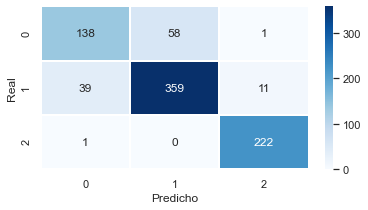

In [165]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,                     
            annot=True,                     
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass